<center><h1 style="color:green; font-weight:bolder">Using Analytical Data Mining Algorithms to Prevent and Control Bandits Attacks in Nigeria</h1></center>


<h1>Introduction</h1>

**Banditry poses a significant threat to the security and economic stability of Nigeria, manifesting through kidnappings, armed robberies, and cattle rustling. These criminal activities have evolved into well-organized operations, impacting communities across the nation. Traditional approaches, such as law enforcement actions and community vigilantes, have primarily been reactive and insufficient in addressing the root causes or preventing future incidents. This research aims to explore how analytical data mining algorithms can be utilized as a proactive tool to forecast and mitigate banditry incidents across Nigeria's regions.**

**Data mining, as a discipline, involves uncovering unexpected, valuable, or meaningful patterns within large datasets. In simpler terms, it is the process of sorting through extensive data to identify relationships and trends that can provide actionable insights. By applying data mining techniques, this study seeks to uncover patterns in historical crime data and related socioeconomic factors, offering innovative solutions to predict and control banditry activities.**

## Now we deep dive into the analysis

**Linear Algebra,Statistics and Data Analysis libraries**

In [231]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')
# from bokeh.io import output_notebook, show
import datetime as dt
import calendar
from datetime import date

**Import Data Visualisation libaries**

In [232]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
# Set the Seaborn style for better aesthetics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="deep")
import plotly.express as px


**Import Geospatial Data Visualisation  Libraries (maps visualisation)**

In [234]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# **1. Data Cleaning & Processing**

**Load Cleaned Dataset**

In [235]:
# load the dataset

crimes_df = pd.read_csv(r"C:\Users\acer\Documents\PROJECTS\New folder\Feburary2025\NG-CRIME-HOTSPOT\Data-collection\data\Clean_Data\final_ng_crime_analysis_data.csv")
crimes_df.EVENT_DATE = pd.to_datetime(crimes_df['EVENT_DATE'])
crimes_df['EVENT_MONTH'] = crimes_df.EVENT_DATE.apply(lambda x: x.strftime('%B'))
crimes_df['MONTH'] = crimes_df.EVENT_DATE.dt.month
# crimes_df.drop('YEAR.1',axis=1,inplace=True)

### **1.1 Data Overview**

In [236]:
crimes_df.head(10)

EVENT_DATE  YEAR                  EVENT_TYPE  \
0 2023-12-31  2023  Violence against civilians   
1 2023-12-31  2023      Strategic developments   
2 2023-12-31  2023  Violence against civilians   
3 2023-12-31  2023  Violence against civilians   
4 2023-12-31  2023  Violence against civilians   
5 2023-12-31  2023                     Battles   
6 2023-12-31  2023                     Battles   
7 2023-12-30  2023                    Protests   
8 2023-12-30  2023                     Battles   
9 2023-12-30  2023                     Battles   

                   SUB_EVENT_TYPE  FATALITIES  \
0                          Attack           0   
1    Looting/property destruction           0   
2                          Attack           2   
3  Abduction/forced disappearance           0   
4                          Attack           1   
5                     Armed clash           2   
6                     Armed clash           3   
7                Peaceful protest           0   
8                     Armed clash          59   
9                     Armed clash           0   

                                ACTOR1        STATE           LGA  \
0   Unidentified Armed Group (Nigeria)  Cross River          Ikom   
1     Niger Communal Militia (Nigeria)        Niger       Shiroro   
2      Fulani Ethnic Militia (Nigeria)      Plateau         Mangu   
3   Unidentified Armed Group (Nigeria)         Ogun   Ijebu North   
4  Unidentified Cult Militia (Nigeria)          Edo         Oredo   
5     Police Forces of Nigeria (2023-)      Anambra  Orumba North   
6   Military Forces of Nigeria (2023-)        Borno        Damboa   
7                 Protesters (Nigeria)        Delta   Isoko South   
8    Kaduna Communal Militia (Nigeria)       Kaduna  Birnin Gwari   
9     Police Forces of Nigeria (2023-)         Kogi      Ajaokuta   

            DISORDER_TYPE    LOCATION  ...    CRIME RATE  POVERTY_RATE  \
0      Political violence  Akparabong  ...  0.000000e+00       19.0860   
1  Strategic developments      Kurebe  ...  0.000000e+00       44.5601   
2      Political violence       Mangu  ...  3.842543e-07       42.4669   
3      Political violence  Ijebu-Igbo  ...  0.000000e+00       19.9482   
4      Political violence  Benin City  ...  1.908468e-07        8.3160   
5      Political violence      Ogboji  ...  2.950626e-07        2.0449   
6      Political violence      Damboa  ...  4.431809e-07       53.8861   
7          Demonstrations         Ole  ...  0.000000e+00       11.7821   
8      Political violence     Kakangi  ...  5.944153e-06       34.0943   
9      Political violence       Adogo  ...  0.000000e+00       14.0219   

   DEPRIVATION_INTENSITY  VULNERABILITY_RATE  SEVERE_POVERTY_RATE  \
0                40.6066             34.7097               3.9392   
1                49.1694             17.7555              22.7942   
2                45.7951             30.4358              16.2632   
3                46.0279             23.5266               6.9381   
4                43.0149              6.3309               1.6950   
5                43.3105             13.7643               0.5472   
6                54.2321             23.3856              31.1462   
7                43.0696             17.0435               3.0882   
8                49.0019             16.4337              14.6989   
9                45.4947             23.3145               5.6812   

   POVERTY LEVEL  STATE_AREA  POPULATION_DENSITY EVENT_MONTH  MONTH  
0            Low       20156          233.324320    December     12  
1           High       76363           84.102641    December     12  
2           High       30813          168.918541    December     12  
3            Low       16762          362.878415    December     12  
4            Low       17802          294.337940    December     12  
5            Low        4844         1399.302849    December     12  
6           High       70598           95.884373    December     12  
7            Low

In [118]:
crimes_df.shape

(29735, 23)

<p style="color:red"> Data contains 29,735 rows of Data and 23 columns </p>

In [237]:
crimes_df.columns

Index(['EVENT_DATE', 'YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'FATALITIES',
       'ACTOR1', 'STATE', 'LGA', 'DISORDER_TYPE', 'LOCATION', 'LATITUDE',
       'LONGITUDE', 'POPULATION', 'CRIME RATE', 'POVERTY_RATE',
       'DEPRIVATION_INTENSITY', 'VULNERABILITY_RATE', 'SEVERE_POVERTY_RATE',
       'POVERTY LEVEL', 'STATE_AREA', 'POPULATION_DENSITY', 'EVENT_MONTH',
       'MONTH'],
      dtype='object')

**✅ Handle missing values (if any).**

In [238]:

print("Missing Values:\n", crimes_df.isnull().sum())


Missing Values:
 EVENT_DATE               0
YEAR                     0
EVENT_TYPE               0
SUB_EVENT_TYPE           0
FATALITIES               0
ACTOR1                   0
STATE                    0
LGA                      0
DISORDER_TYPE            0
LOCATION                 0
LATITUDE                 0
LONGITUDE                0
POPULATION               0
CRIME RATE               0
POVERTY_RATE             0
DEPRIVATION_INTENSITY    0
VULNERABILITY_RATE       0
SEVERE_POVERTY_RATE      0
POVERTY LEVEL            0
STATE_AREA               0
POPULATION_DENSITY       0
EVENT_MONTH              0
MONTH                    0
dtype: int64


<p style="color:red"> No missing value </p>


**✅ Ensure correct data types (e.g., datetime for dates).**

In [239]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29735 entries, 0 to 29734
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EVENT_DATE             29735 non-null  datetime64[ns]
 1   YEAR                   29735 non-null  int64         
 2   EVENT_TYPE             29735 non-null  object        
 3   SUB_EVENT_TYPE         29735 non-null  object        
 4   FATALITIES             29735 non-null  int64         
 5   ACTOR1                 29735 non-null  object        
 6   STATE                  29735 non-null  object        
 7   LGA                    29735 non-null  object        
 8   DISORDER_TYPE          29735 non-null  object        
 9   LOCATION               29735 non-null  object        
 10  LATITUDE               29735 non-null  float64       
 11  LONGITUDE              29735 non-null  float64       
 12  POPULATION             29735 non-null  int64         
 13  C

In [240]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29735 entries, 0 to 29734
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   EVENT_DATE             29735 non-null  datetime64[ns]
 1   YEAR                   29735 non-null  int64         
 2   EVENT_TYPE             29735 non-null  object        
 3   SUB_EVENT_TYPE         29735 non-null  object        
 4   FATALITIES             29735 non-null  int64         
 5   ACTOR1                 29735 non-null  object        
 6   STATE                  29735 non-null  object        
 7   LGA                    29735 non-null  object        
 8   DISORDER_TYPE          29735 non-null  object        
 9   LOCATION               29735 non-null  object        
 10  LATITUDE               29735 non-null  float64       
 11  LONGITUDE              29735 non-null  float64       
 12  POPULATION             29735 non-null  int64         
 13  C

<p style="color:red"> We now have the correct datatypes for each variables by making the EVENT_DATE column a datetime datatype</p>

**✅ Remove duplicates or inconsistencies.**

In [241]:
# Check for duplicates
print(crimes_df.duplicated().sum())

0


<p style="color:red"> No duplicates our data is clean</p>

**✅ Let filter Banditry related crime events**

In [246]:
crimes_df.EVENT_TYPE.unique()

array(['Violence against civilians', 'Strategic developments', 'Battles',
       'Protests', 'Riots', 'Explosions/Remote violence'], dtype=object)

In [247]:
crimes_df.SUB_EVENT_TYPE.unique()

array(['Attack', 'Looting/property destruction',
       'Abduction/forced disappearance', 'Armed clash',
       'Peaceful protest', 'Mob violence',
       'Remote explosive/landmine/IED', 'Sexual violence',
       'Change to group/activity', 'Protest with intervention', 'Other',
       'Shelling/artillery/missile attack', 'Air/drone strike',
       'Violent demonstration', 'Disrupted weapons use', 'Arrests',
       'Excessive force against protesters', 'Agreement', 'Grenade',
       'Headquarters or base established',
       'Non-violent transfer of territory', 'Suicide bomb',
       'Government regains territory',
       'Non-state actor overtakes territory'], dtype=object)

In [248]:


# Define the lists of event and sub-event types that align with banditry
banditry_event_types = ['Violence against civilians', 'Explosions/Remote violence', 'Battles']
banditry_sub_event_types = [
    'Attack', 
    'Looting/property destruction', 
    'Abduction/forced disappearance', 
    'Armed clash', 
    'Remote explosive/landmine/IED', 
    'Grenade'
]

# Filter the dataset based on the selected event and sub-event types
banditry_df = crimes_df[
    (crimes_df['EVENT_TYPE'].isin(banditry_event_types)) &
    (crimes_df['SUB_EVENT_TYPE'].isin(banditry_sub_event_types))
]

# # Check the filtered DataFrame
# display(banditry_df.head())




In [249]:
# Create a new column to classify banditry-related events
crimes_df['IS_BANDITRY'] = crimes_df.apply(
    lambda row: 1 if (row['EVENT_TYPE'] in banditry_event_types and 
                      row['SUB_EVENT_TYPE'] in banditry_sub_event_types) else 0, 
    axis=1
)
crimes_df['IS_NON_BANDITRY'] = 1 - crimes_df['IS_BANDITRY']

<p style="color:red"> we  select the relevant incident related to  bandit attack from  the EVENT_TYPE columns and SUB_EVENT_TYPE columns</p>

In [250]:
crimes_df.tail()

EVENT_DATE  YEAR                  EVENT_TYPE    SUB_EVENT_TYPE  \
29730 2013-01-03  2013  Violence against civilians            Attack   
29731 2013-01-03  2013                     Battles       Armed clash   
29732 2013-01-03  2013                     Battles       Armed clash   
29733 2013-01-02  2013                    Protests  Peaceful protest   
29734 2013-01-01  2013                     Battles       Armed clash   

       FATALITIES                                  ACTOR1    STATE  \
29730           2      Unidentified Armed Group (Nigeria)  Adamawa   
29731           2  Military Forces of Nigeria (1999-2015)  Adamawa   
29732           0    Police Forces of Nigeria (1999-2015)    Borno   
29733           0                    Protesters (Nigeria)      Imo   
29734          14  Military Forces of Nigeria (1999-2015)    Borno   

                    LGA       DISORDER_TYPE   LOCATION  ...  \
29730              Song  Political violence       Song  ...   
29731              Song  Political violence       Song  ...   
29732   Maiduguri Metro  Political violence  Maiduguri  ...   
29733  Owerri Municipal      Demonstrations     Owerri  ...   
29734   Maiduguri Metro  Political violence  Maiduguri  ...   

       DEPRIVATION_INTENSITY  VULNERABILITY_RATE  SEVERE_POVERTY_RATE  \
29730                50.6329             30.7248              18.5325   
29731                50.6329             30.7248              18.5325   
29732                52.8506             11.3477              43.7696   
29733                45.1687             14.2165               4.6209   
29734                52.8506             11.3477              43.7696   

       POVERTY LEVEL  STATE_AREA  POPULATION_DENSITY  EVENT_MONTH  MONTH  \
29730         Medium       36917          111.024487      January      1   
29731         Medium       36917          111.024487      January      1   
29732           High       70598           76.175246      January      1   
29733            Low        5530          915.702170      January      1   
29734           High       70598           76.175246      January      1   

      IS_BANDITRY  IS_NON_BANDITRY  
29730           1                0  
29731           1                0  
29732           1                0  
29733           0                1  
29734           1                0  

[5 rows x 25 columns]

## **Descriptive Statistics**

**✅Summary statistics for numerical columns**


In [252]:
# Display summary statistics for numerical columns
numeric_summary = crimes_df.describe().T
display(numeric_summary)


count                           mean  \
EVENT_DATE               29735  2020-01-16 20:01:26.685723904   
YEAR                   29735.0                    2019.551539   
FATALITIES             29735.0                       2.965125   
LATITUDE               29735.0                       8.809914   
LONGITUDE              29735.0                       7.989865   
POPULATION             29735.0                 6230444.791996   
CRIME RATE             29735.0                       0.000001   
POVERTY_RATE           29735.0                       31.50709   
DEPRIVATION_INTENSITY  29735.0                      47.649969   
VULNERABILITY_RATE     29735.0                      17.393918   
SEVERE_POVERTY_RATE    29735.0                      16.288011   
STATE_AREA             29735.0                   31419.677653   
POPULATION_DENSITY     29735.0                     510.634218   
MONTH                  29735.0                       6.432857   
IS_BANDITRY            29735.0                        0.59694   
IS_NON_BANDITRY        29735.0                        0.40306   

                                       min                  25%  \
EVENT_DATE             2013-01-01 00:00:00  2018-01-27 00:00:00   
YEAR                                2013.0               2018.0   
FATALITIES                             0.0                  0.0   
LATITUDE                            4.3032               6.4531   
LONGITUDE                           2.7222               6.1755   
POPULATION                       1813328.0            4784031.0   
CRIME RATE                             0.0                  0.0   
POVERTY_RATE                        1.1054              10.1775   
DEPRIVATION_INTENSITY              38.0847              43.0149   
VULNERABILITY_RATE                  1.5253              11.9548   
SEVERE_POVERTY_RATE                 0.1567             2.953733   
STATE_AREA                          3345.0              10773.0   
POPULATION_DENSITY               54.313954           109.546742   
MONTH                                  1.0                  3.0   
IS_BANDITRY                            0.0                  0.0   
IS_NON_BANDITRY                        0.0                  0.0   

                                       50%                  75%  \
EVENT_DATE             2020-10-22 00:00:00  2022-06-01 00:00:00   
YEAR                                2020.0               2022.0   
FATALITIES                             0.0                  2.0   
LATITUDE                            8.8167              11.2333   
LONGITUDE                           7.3667               9.0916   
POPULATION                       5947818.0            6769245.0   
CRIME RATE                             0.0                  0.0   
POVERTY_RATE                       27.0206            52.099367   
DEPRIVATION_INTENSITY               46.545              52.7155   
VULNERABILITY_RATE                 16.4337              23.3856   
SEVERE_POVERTY_RATE               9.812567              29.1894   
STATE_AREA                         25673.0              46053.0   
POPULATION_DENSITY              220.155296           441.148603   
MONTH                                  6.0                 10.0   
IS_BANDITRY                            1.0                  1.0   
IS_NON_BANDITRY                        0.0                  1.0   

                                       max             std  
EVENT_DATE             2023-12-31 00:00:00             NaN  
YEAR                                2023.0        2.929376  
FATALITIES                           600.0       11.905557  
LATITUDE                           13.7844        2.600568  
LONGITUDE                            14.65        3.002938  
POPULATION                      15915201.0  2642712.630397  
CRIME RATE                        0.000109        0.000002  
POVERTY_RATE                       85.4131       22.549339  
DEPRIVATION_INTENSITY              63.9232        5.547585  
VULNERABILITY_RATE           

**✅Summary statistics for Categorical columns**

In [253]:
crimes_df.describe(include='O')

# Display summary statistics for numerical columns
cat_summary = crimes_df.describe(include='O').T
display(cat_summary)


count unique                         top   freq
EVENT_TYPE      29735      6  Violence against civilians  10327
SUB_EVENT_TYPE  29735     24                      Attack   7913
ACTOR1          29735    675        Protesters (Nigeria)   6320
STATE           29735     37                       Borno   4705
LGA             29735    742             Abuja Municipal   1142
DISORDER_TYPE   29735      4          Political violence  20873
LOCATION        29735   4508                       Abuja    952
POVERTY LEVEL   29735      3                         Low  13632
EVENT_MONTH     29735     12                     January   2610

## **🔍Key Insight**
**Numarical variable:**

- The event record to be analysed contains 29,735 crime events spanning from 2013 to 2023 with an average year of about 2019.55, ensuring robust temporal coverage.
- With Fatalities at a median of 0 and a maximum of 600, most incidents are non-lethal, but a few extremely severe events exist.
- Poverty rate, deprivation intensity, and vulnerability rates show wide variation (e.g., Poverty Rate ranges from 1.1% to 85.4%), indicating significant regional disparities.
- High variance in population figures suggests that normalizing crime counts (e.g., per capita) could be important, while the overall crime rate is very low, reflecting its calculation scale.

**Categorical variable**
- "Violence against civilians" is the most frequent EVENT_TYPE (10,327 occurrences), indicating it is the prevailing crime category.
- "Attack" is the leading SUB_EVENT_TYPE (7,913 occurrences), highlighting direct violent incidents as common.
- Borno is the most common STATE with crime events (4,705 events) out of the whole 37 states of the country, suggesting a regional hotspot for these incidents.
- The majority of events are labeled with a "Low" poverty level (13,632 occurrences), which may prompt further examination of how poverty is measured relative to crime rates.


**✅Check for unique categories in categorical variables**

In [131]:

print("\nUnique Categories:\n", crimes_df.nunique().sort_values())


Unique Categories:
 IS_NON_BANDITRY             2
IS_BANDITRY                 2
POVERTY LEVEL               3
DISORDER_TYPE               4
EVENT_TYPE                  6
YEAR                       11
MONTH                      12
EVENT_MONTH                12
SUB_EVENT_TYPE             24
STATE                      37
STATE_AREA                 37
FATALITIES                111
SEVERE_POVERTY_RATE       332
VULNERABILITY_RATE        333
POVERTY_RATE              333
DEPRIVATION_INTENSITY     333
POPULATION                405
POPULATION_DENSITY        407
ACTOR1                    675
LGA                       742
CRIME RATE               2954
EVENT_DATE               3923
LATITUDE                 4348
LONGITUDE                4423
LOCATION                 4508
dtype: int64


# **2. Exploratory Data Analysis (EDA) & Data Visualizations**

###  **Numerical Analysis**

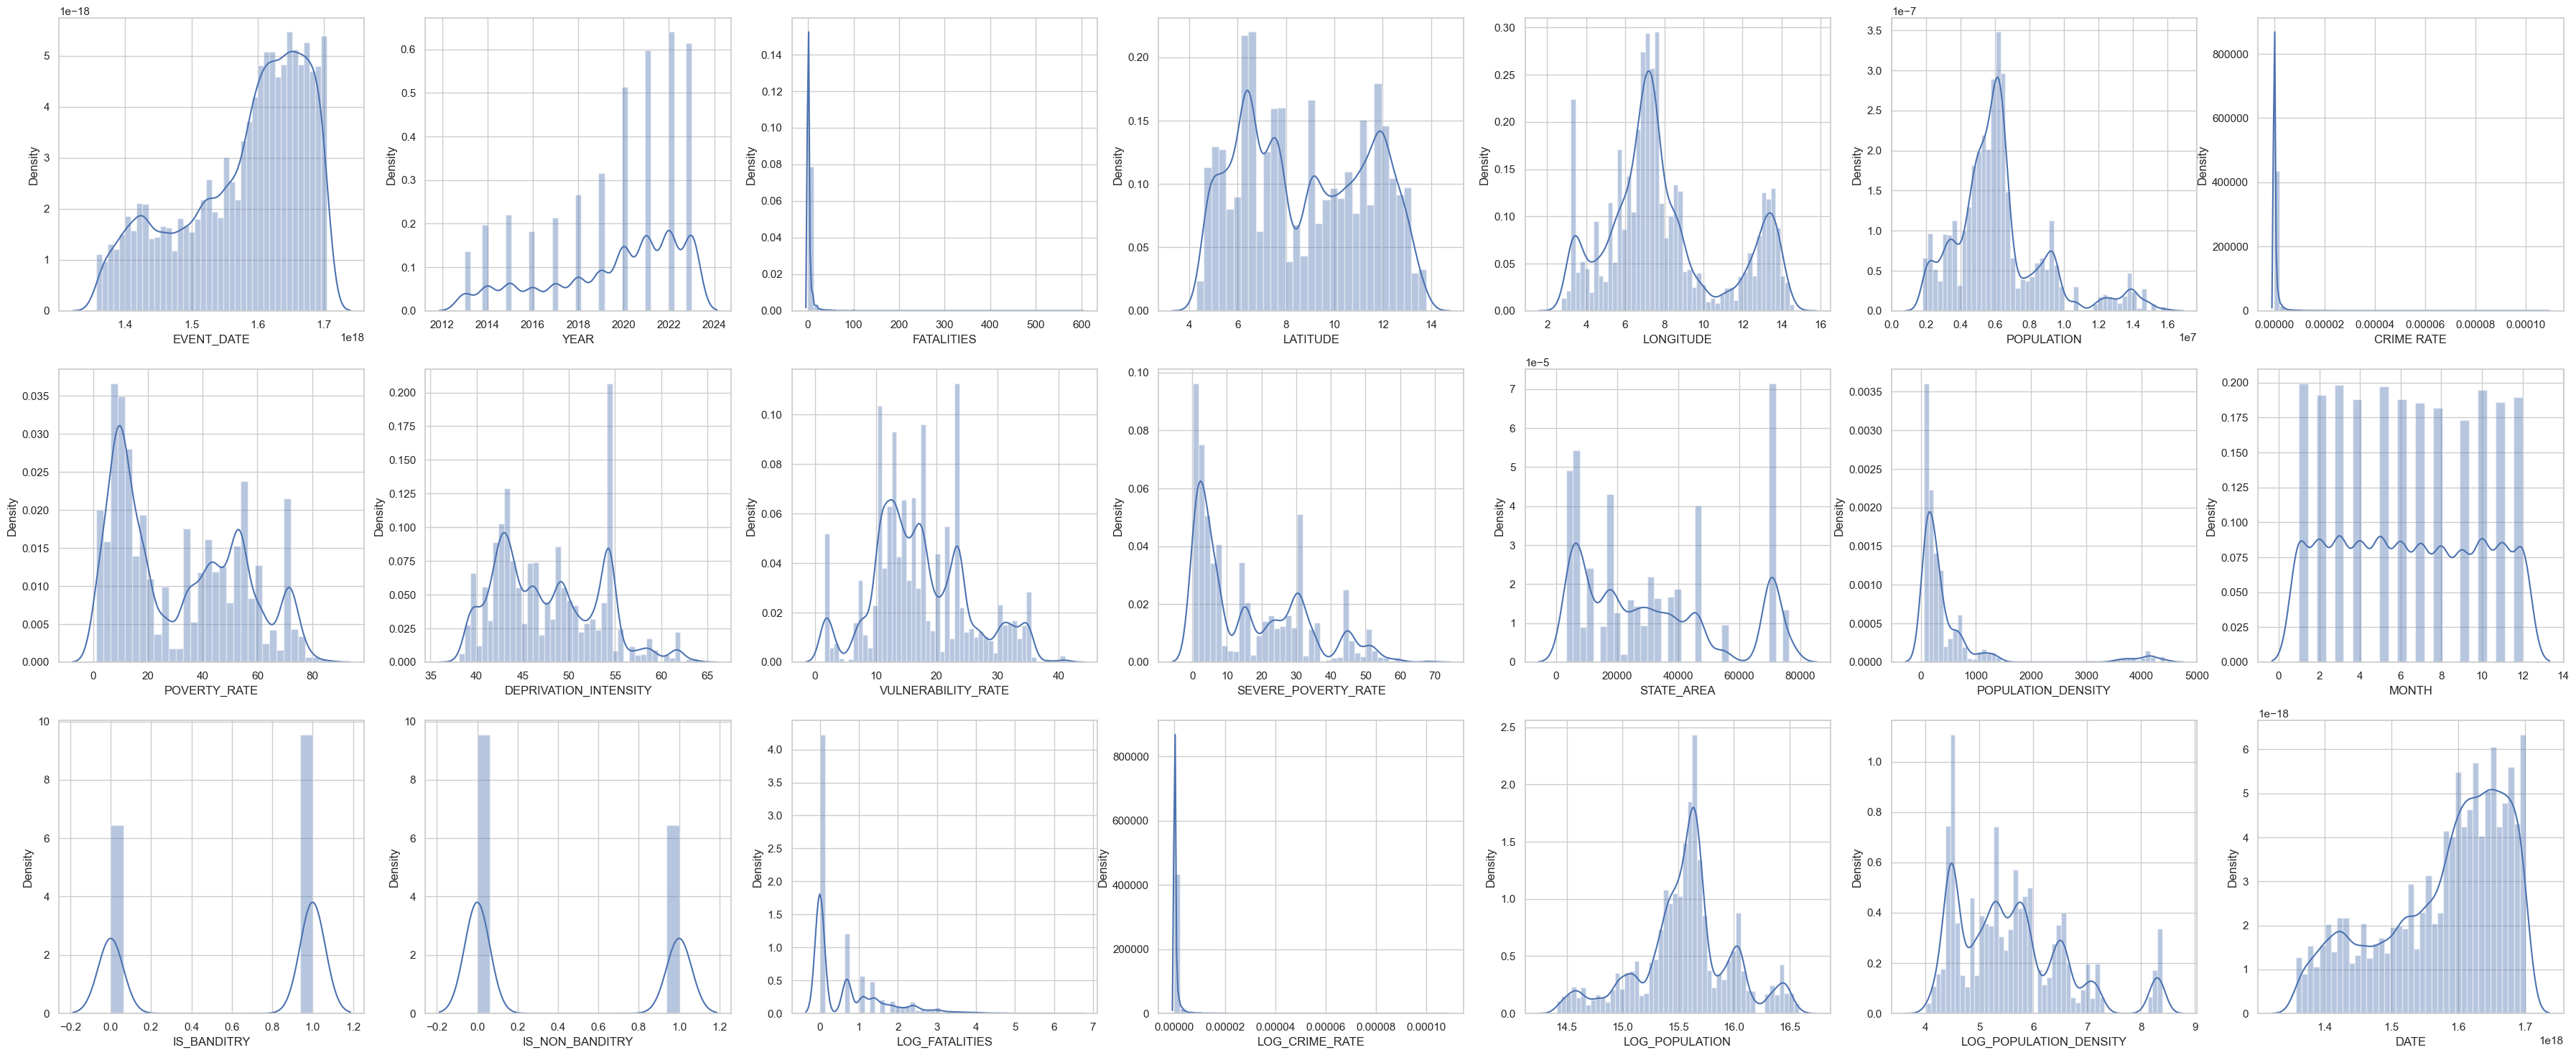

In [230]:

numerical_features = [feature for feature in crimes_df.columns if crimes_df[feature].dtypes != 'O']
plt.figure(figsize=(45,18), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(3,7,plotnumber)
    sns.distplot(crimes_df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1 

plt.show()

In [133]:
crimes_df[numerical_features].head()

EVENT_DATE  YEAR  FATALITIES  LATITUDE  LONGITUDE  POPULATION    CRIME RATE  \
0 2023-12-31  2023           0    6.0344     8.7531     4702885  0.000000e+00   
1 2023-12-31  2023           0   10.4674     6.9228     6422330  0.000000e+00   
2 2023-12-31  2023           2    9.5206     9.0977     5204887  3.842543e-07   
3 2023-12-31  2023           0    6.9798     4.0033     6082568  0.000000e+00   
4 2023-12-31  2023           1    6.3351     5.6275     5239804  1.908468e-07   

   POVERTY_RATE  DEPRIVATION_INTENSITY  VULNERABILITY_RATE  \
0       19.0860                40.6066             34.7097   
1       44.5601                49.1694             17.7555   
2       42.4669                45.7951             30.4358   
3       19.9482                46.0279             23.5266   
4        8.3160                43.0149              6.3309   

   SEVERE_POVERTY_RATE  STATE_AREA  POPULATION_DENSITY  MONTH  IS_BANDITRY  \
0               3.9392       20156          233.324320     12            1   
1              22.7942       76363           84.102641     12            0   
2              16.2632       30813          168.918541     12            1   
3               6.9381       16762          362.878415     12            1   
4               1.6950       17802          294.337940     12            1   

   IS_NON_BANDITRY  
0                0  
1                1  
2                0  
3                0  
4                0

In [134]:
crimes_df.select_dtypes(['int','float']).columns

Index(['YEAR', 'FATALITIES', 'LATITUDE', 'LONGITUDE', 'POPULATION',
       'CRIME RATE', 'POVERTY_RATE', 'DEPRIVATION_INTENSITY',
       'VULNERABILITY_RATE', 'SEVERE_POVERTY_RATE', 'STATE_AREA',
       'POPULATION_DENSITY', 'MONTH', 'IS_BANDITRY', 'IS_NON_BANDITRY'],
      dtype='object')

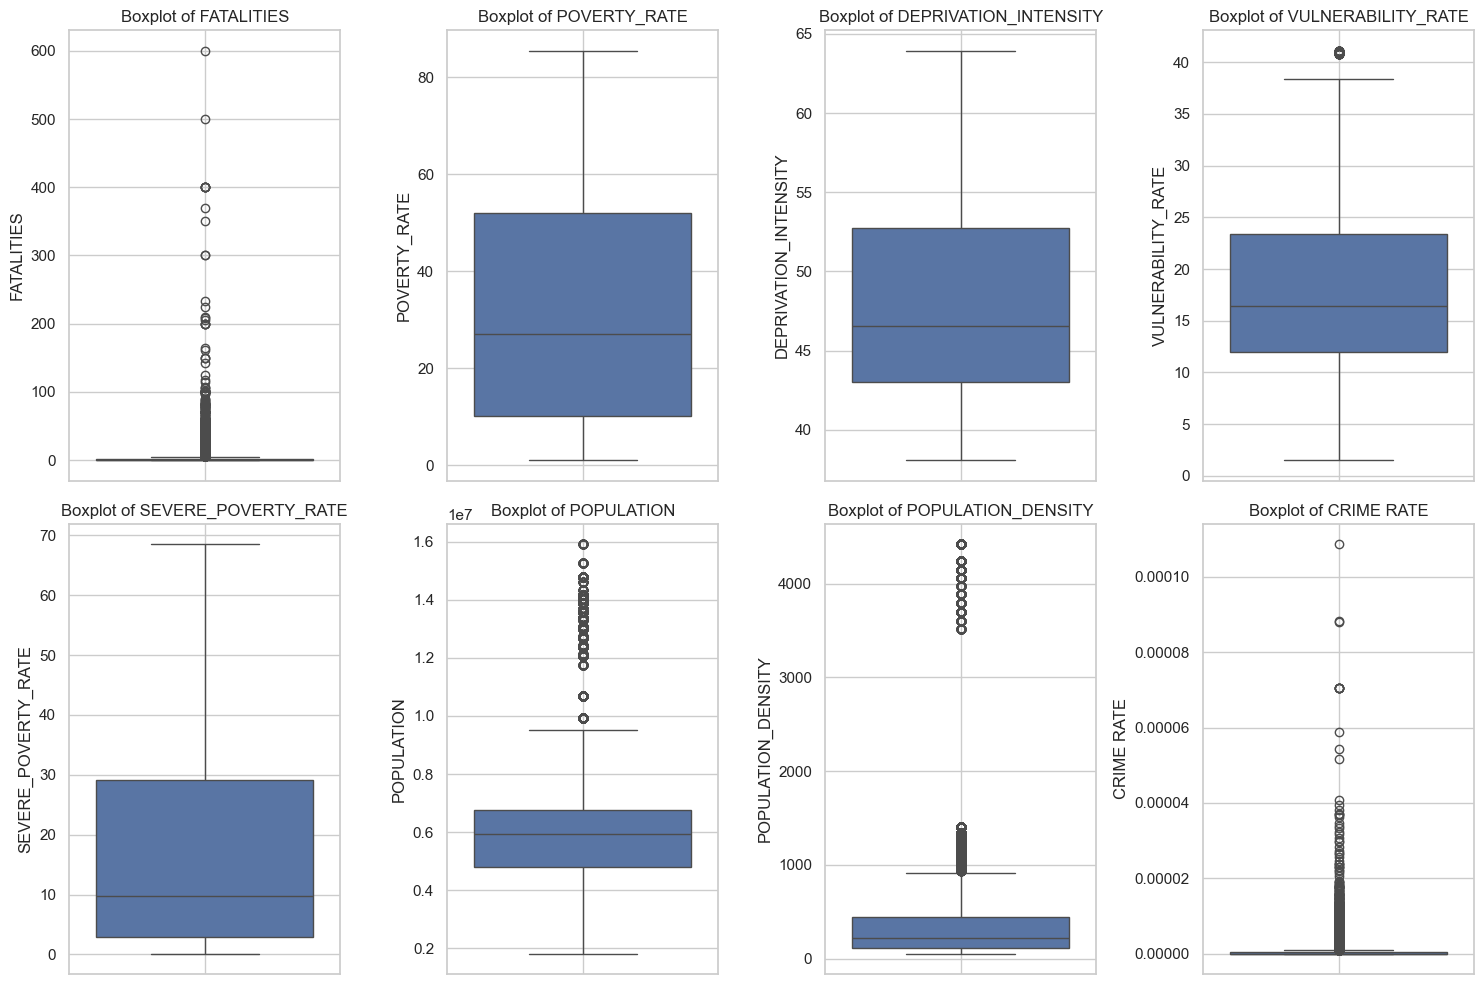

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables
num_cols = ["FATALITIES", "POVERTY_RATE", "DEPRIVATION_INTENSITY", "VULNERABILITY_RATE", 
            "SEVERE_POVERTY_RATE", "POPULATION", 'POPULATION_DENSITY',"CRIME RATE"]

# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=crimes_df[col],)
    plt.title(f"Boxplot of {col}")
    plt.grid(True)
plt.tight_layout()
plt.show()


**🔍Insight**

<p style="color:red"> we observe there are outliers in fatalities, crime rate and population data. and the best we can do is to apply log transformation so we have a normalised data for future analysis such as correlation analysis and predictive modelling that are sensitive to outliers</p>

###  **Applying Log Transform**

In [136]:
crimes_df.columns

Index(['EVENT_DATE', 'YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'FATALITIES',
       'ACTOR1', 'STATE', 'LGA', 'DISORDER_TYPE', 'LOCATION', 'LATITUDE',
       'LONGITUDE', 'POPULATION', 'CRIME RATE', 'POVERTY_RATE',
       'DEPRIVATION_INTENSITY', 'VULNERABILITY_RATE', 'SEVERE_POVERTY_RATE',
       'POVERTY LEVEL', 'STATE_AREA', 'POPULATION_DENSITY', 'EVENT_MONTH',
       'MONTH', 'IS_BANDITRY', 'IS_NON_BANDITRY'],
      dtype='object')

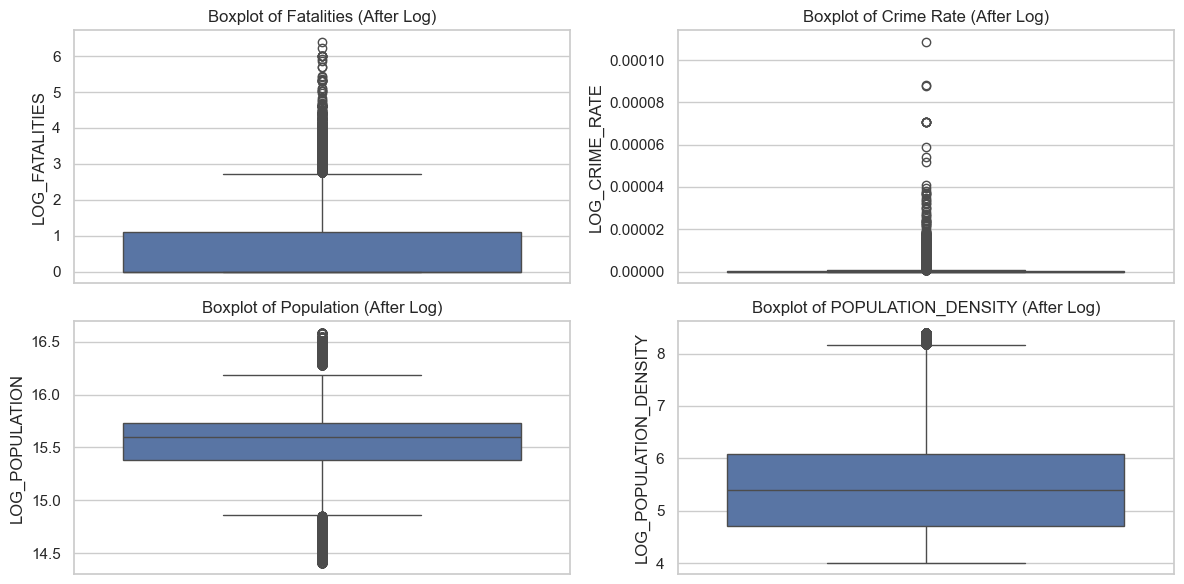

In [137]:
import numpy as np

# Apply log1p transformation
crimes_df["LOG_FATALITIES"] = np.log1p(crimes_df["FATALITIES"])
crimes_df["LOG_CRIME_RATE"] = np.log1p(crimes_df["CRIME RATE"])
crimes_df["LOG_POPULATION"] = np.log1p(crimes_df["POPULATION"])
crimes_df["LOG_POPULATION_DENSITY"] = np.log1p(crimes_df["POPULATION_DENSITY"])
# Boxplot after transformation
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.boxplot(y=crimes_df["LOG_FATALITIES"], ax=axes[0][0])
axes[0][0].set_title("Boxplot of Fatalities (After Log)")

sns.boxplot(y=crimes_df["LOG_CRIME_RATE"], ax=axes[0][1])
axes[0][1].set_title("Boxplot of Crime Rate (After Log)")

sns.boxplot(y=crimes_df["LOG_POPULATION"], ax=axes[1][0])
axes[1][0].set_title("Boxplot of Population (After Log)")


sns.boxplot(y=crimes_df["LOG_POPULATION_DENSITY"], ax=axes[1][1])
axes[1][1].set_title("Boxplot of POPULATION_DENSITY (After Log)")


plt.tight_layout()
plt.show()


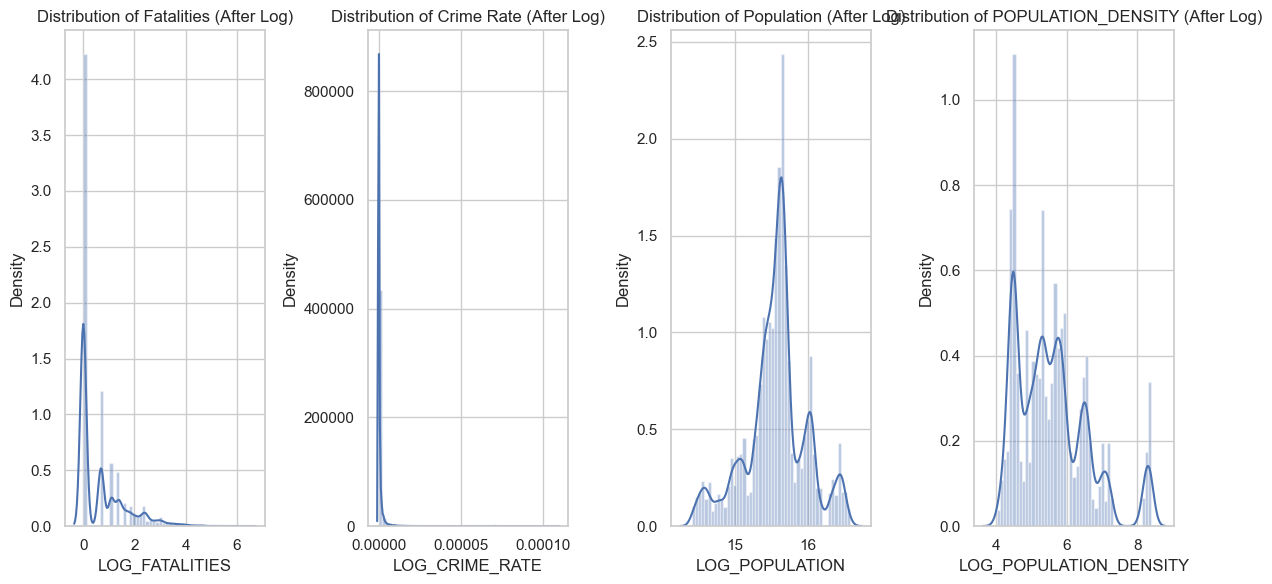

In [138]:
# Boxplot after transformation
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

sns.distplot(crimes_df["LOG_FATALITIES"], ax=axes[0])
axes[0].set_title("Distribution of Fatalities (After Log)")

sns.distplot(crimes_df["LOG_CRIME_RATE"], ax=axes[1])
axes[1].set_title("Distribution of Crime Rate (After Log)")

sns.distplot(crimes_df["LOG_POPULATION"], ax=axes[2])
axes[2].set_title("Distribution of Population (After Log)")



sns.distplot(crimes_df["LOG_POPULATION_DENSITY"], ax=axes[3])
axes[3].set_title("Distribution of POPULATION_DENSITY (After Log)")

plt.tight_layout()
plt.show()


In [139]:
num_cols=['POPULATION', 'CRIME RATE', 'POVERTY_RATE', 'FATALITIES',]
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in key numerical columns
for col in num_cols:
    outliers = detect_outliers_iqr(crimes_df, col)
    print(f"{col}: {len(outliers)} potential outliers detected")


POPULATION: 2376 potential outliers detected
CRIME RATE: 3780 potential outliers detected
POVERTY_RATE: 0 potential outliers detected
FATALITIES: 3593 potential outliers detected


## **📊 A. Overall Crime Trends (2013-2023)**

**Total crime incidents per year (banditry & non-banditry).**

**✅Line plot of overall crime trends.**

In [140]:
# Group by year and count events
yearly_crime_trends = crimes_df.groupby('YEAR').size()
yearly_crime_trends

YEAR
2013    1045
2014    1508
2015    1675
2016    1396
2017    1633
2018    2030
2019    2414
2020    3914
2021    4560
2022    4880
2023    4680
dtype: int64

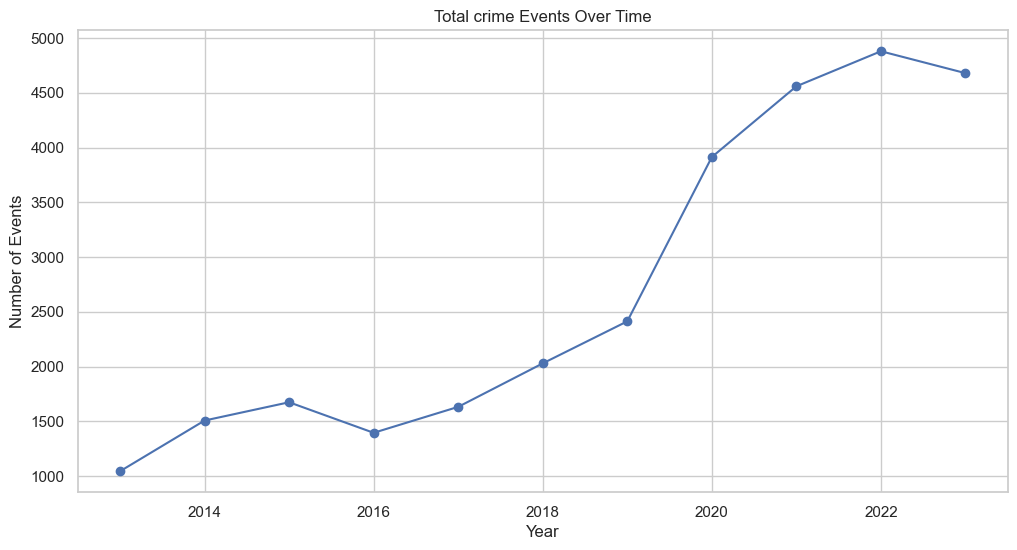

In [141]:
# Group by year and count events
yearly_crime_trends = crimes_df.groupby('YEAR').size()
plt.figure(figsize=(12, 6))
yearly_crime_trends.plot(kind='line', marker='o')
plt.title('Total crime Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.savefig('totalcrimebyyear.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()

**✅Fatalities over time (to check if banditry became deadlier)**

In [142]:
total_fatalities=crimes_df.groupby('YEAR')['FATALITIES'].sum()
total_fatalities

YEAR
2013     4681
2014    11389
2015    11110
2016     4891
2017     4949
2018     6162
2019     5951
2020     8481
2021    10949
2022    10838
2023     8767
Name: FATALITIES, dtype: int64

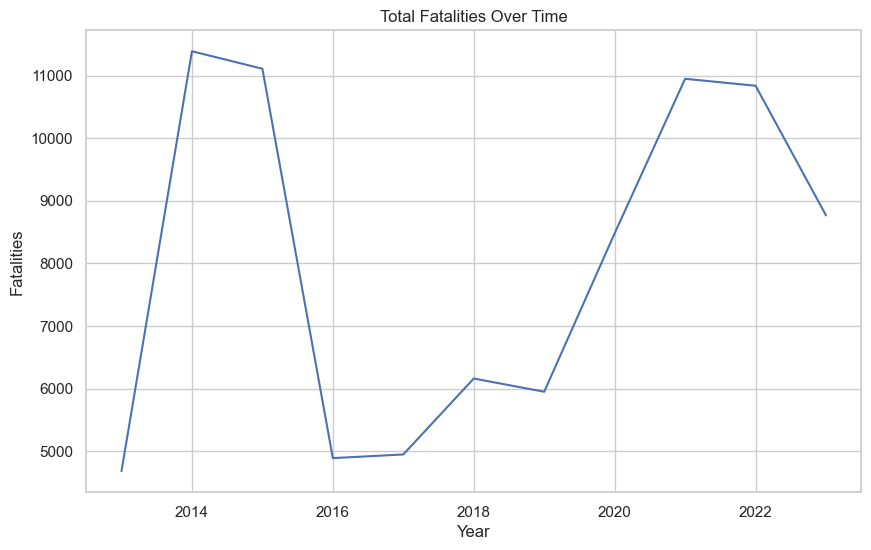

In [143]:
# Time-series plot
total_fatalities.plot(kind='line', figsize=(10, 6))
plt.title('Total Fatalities Over Time')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.show()

## **🔍 Key Insight**
1️⃣ General Crime Trend:

- Crime incidents have increased over the years, with a significant shoot up from 2018 onwards.
- The most notable spike occurred in 2020 (3914 cases), continuing into 2021 (4560) and 2022 (4880), before slightly declining in 2023 (4680).
- This suggests that certain events (e.g., COVID-19, economic downturns, insecurity) may have contributed to the rise in crime post-2020.

2️⃣ Fatalities Trend:

- Fatalities follow a similar increasing pattern, with peaks in 2014, 2015, 2020, and 2021.
- 2014 and 2015 had the highest fatalities (11,389 and 11,110 deaths, respectively), likely linked to major insurgency activities (e.g., Boko Haram attacks in the Northeast).
- After a decline in 2016-2019, fatalities spiked again in 2020-2022, which aligns with the increase in crime incidents.
- Interestingly, while crime incidents slightly dropped in 2023, fatalities remained high (8,767 deaths), suggesting that crime may have become more targeted and fatal rather than just more frequent.




## **📌Recommendations**
- Investigate External Triggers: The sharp increases in 2020-2022 require further investigation into factors such as economic hardship, political instability, and security failures.
- Crime vs. Fatalities Analysis: The fatalities trend does not perfectly align with crime incidents, meaning some years had fewer crimes but were more deadly (e.g., 2014, 2015).
- Policy Interventions Needed: The consistent rise post-2020 indicates that existing security measures may have been inadequate. A geospatial analysis of high-risk areas can help target interventions.

## **📊 B. Banditry vs. Non-Banditry Trends**

In [144]:

# Group banditry-related events by year
banditry_trends = crimes_df[crimes_df['IS_BANDITRY'] == 1].groupby('YEAR').size()
non_banditry_trends =crimes_df[crimes_df['IS_NON_BANDITRY'] == 1].groupby('YEAR').size()


In [145]:
non_banditry_trends

YEAR
2013     366
2014     713
2015    1050
2016     802
2017     902
2018     887
2019    1036
2020    1516
2021    1453
2022    1708
2023    1552
dtype: int64

In [146]:
banditry_trends

YEAR
2013     679
2014     795
2015     625
2016     594
2017     731
2018    1143
2019    1378
2020    2398
2021    3107
2022    3172
2023    3128
dtype: int64

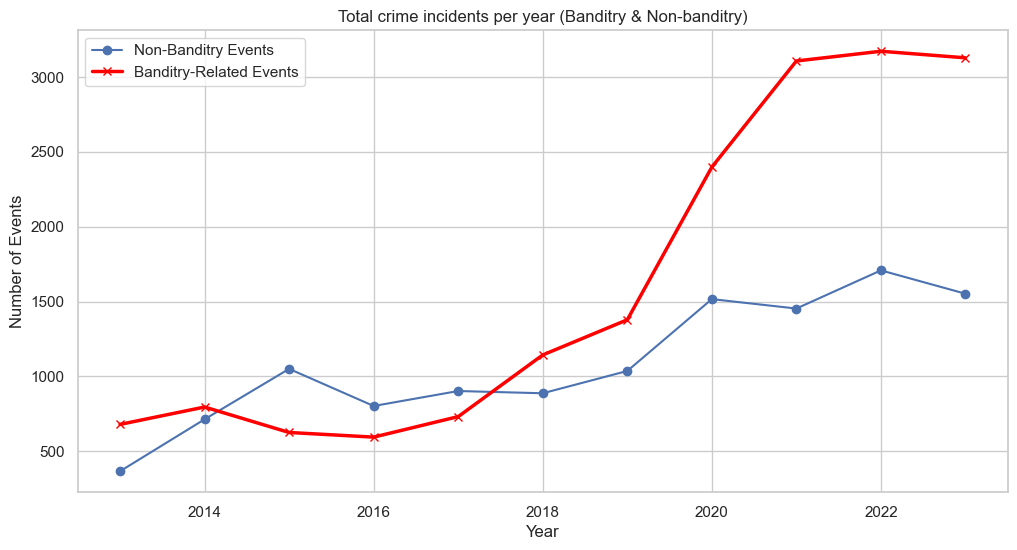

In [147]:

# Plot all events and banditry-related events
plt.figure(figsize=(12, 6))
non_banditry_trends.plot(kind='line', label='Non-Banditry Events', marker='o')
banditry_trends.plot(kind='line', label='Banditry-Related Events', color='red', linewidth=2.5, marker='x')
plt.title('Total crime incidents per year (Banditry & Non-banditry)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.legend()
plt.savefig('banditvsnobaditovertime.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()

## **🔍Key Insight**






1️⃣ Banditry incidents have increased significantly, especially after 2018. This confirms a major surge in banditry starting around 2019/2020, aligning with socioeconomic challenges and security breakdowns.

2️⃣ Non-banditry crimes followed a slower, steadier increase. 2013-2016: Non-banditry incidents were often higher or comparable to banditry but After 2019, banditry cases outpaced non-banditry significantly, suggesting a shift in crime dynamics.
  
3️⃣ The most significant jump for both banditry & non-banditry was in 2020. This suggests that COVID-19 and economic disruptions in 2020 may have escalated both types of crimes.

4️⃣. Banditry remained high in 2021-2023, while non-banditry stabilized. Banditry kept increasing in 2021 (3,134 cases) and 2022 (3,267 cases), before slightly dropping in 2023. Non-banditry stabilized between 1,400 - 1,600 cases each year after 2020, meaning other forms of crime didn’t escalate as much as banditry.





 **✅Crime incidents by month (Jan-Dec) across all years.**

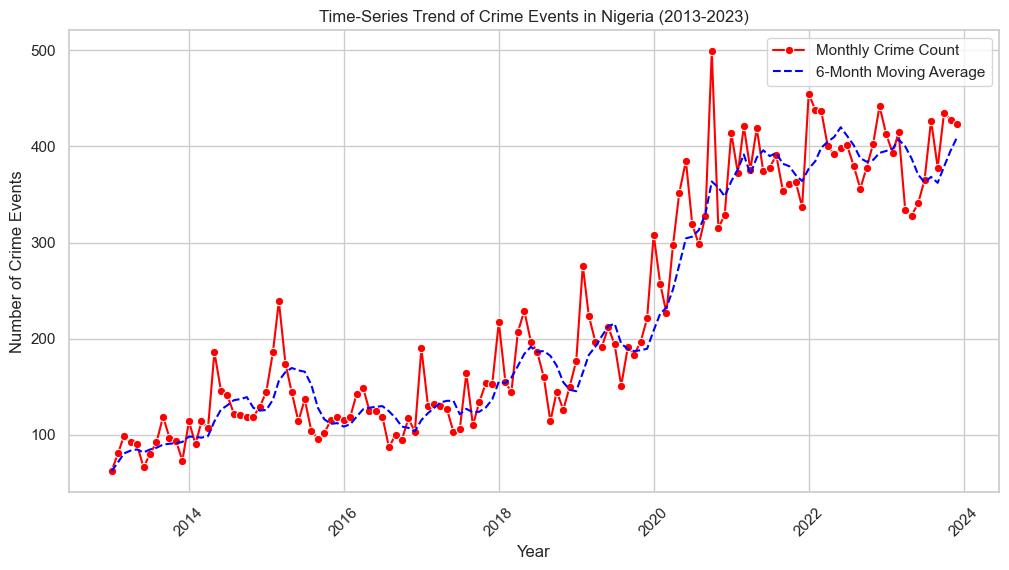

In [148]:
# Convert EVENT_DATE to datetime
crimes_df["EVENT_DATE"] = pd.to_datetime(crimes_df["EVENT_DATE"])

# Aggregate crime counts per month
monthly_trend = crimes_df.groupby(["YEAR", "MONTH"]).size().reset_index(name="Crime_Count")

# Convert YEAR and MONTH to a datetime format
monthly_trend["Date"] = pd.to_datetime(monthly_trend["YEAR"].astype(str) + "-" + monthly_trend["MONTH"].astype(str) + "-01")

# Compute a 6-month moving average for better trend visibility
monthly_trend["MA_6M"] = monthly_trend["Crime_Count"].rolling(window=6, min_periods=1).mean()

# Plot time-series trend with moving average
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Crime_Count", data=monthly_trend, marker="o", color="red", label="Monthly Crime Count")
sns.lineplot(x="Date", y="MA_6M", data=monthly_trend, linestyle="--", color="blue", label="6-Month Moving Average")
plt.title("Time-Series Trend of Crime Events in Nigeria (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Crime Events")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [149]:
monthly_trend

YEAR  MONTH  Crime_Count       Date       MA_6M
0    2013      1           62 2013-01-01   62.000000
1    2013      2           81 2013-02-01   71.500000
2    2013      3           99 2013-03-01   80.666667
3    2013      4           92 2013-04-01   83.500000
4    2013      5           90 2013-05-01   84.800000
..    ...    ...          ...        ...         ...
127  2023      8          427 2023-08-01  368.333333
128  2023      9          378 2023-09-01  362.166667
129  2023     10          435 2023-10-01  379.000000
130  2023     11          428 2023-11-01  395.666667
131  2023     12          423 2023-12-01  409.333333

[132 rows x 5 columns]

 **✅Average Crime Events Per Month (Jan-Dec)**

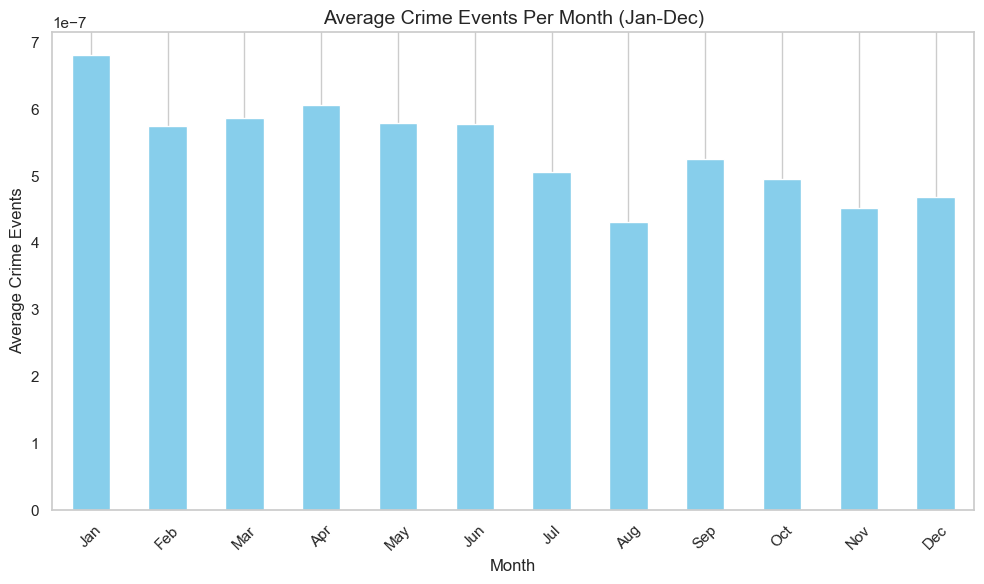

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df
# Ensure the 'EVENT_MONTH' column is in datetime format (if it's not already)
crimes_df['DATE'] = pd.to_datetime(crimes_df[['YEAR', 'MONTH']].assign(DAY=1))

# Group by month and calculate average crime events
monthly_avg = crimes_df.groupby(crimes_df['DATE'].dt.month)['CRIME RATE'].mean()

# Plot the average crime events per month
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Crime Events Per Month (Jan-Dec)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Crime Events', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## **📊 C. State-Level Banditry Analysis**

 **✅Top 10 states with the highest banditry incidents(2020-2022).**

In [151]:
# Filter for banditry cases between 2020-2022
banditry_df=crimes_df[crimes_df['IS_BANDITRY']==1]
banditry_recent = banditry_df[(banditry_df["YEAR"] >= 2020) & (banditry_df["YEAR"] <= 2022)]

# Group by state and count banditry cases
banditry_states = banditry_recent.groupby("STATE").size().reset_index(name="Banditry_Incidents")

# Sort and select top 10 most affected states
top_banditry_states = banditry_states.sort_values(by="Banditry_Incidents", ascending=False).head(10)

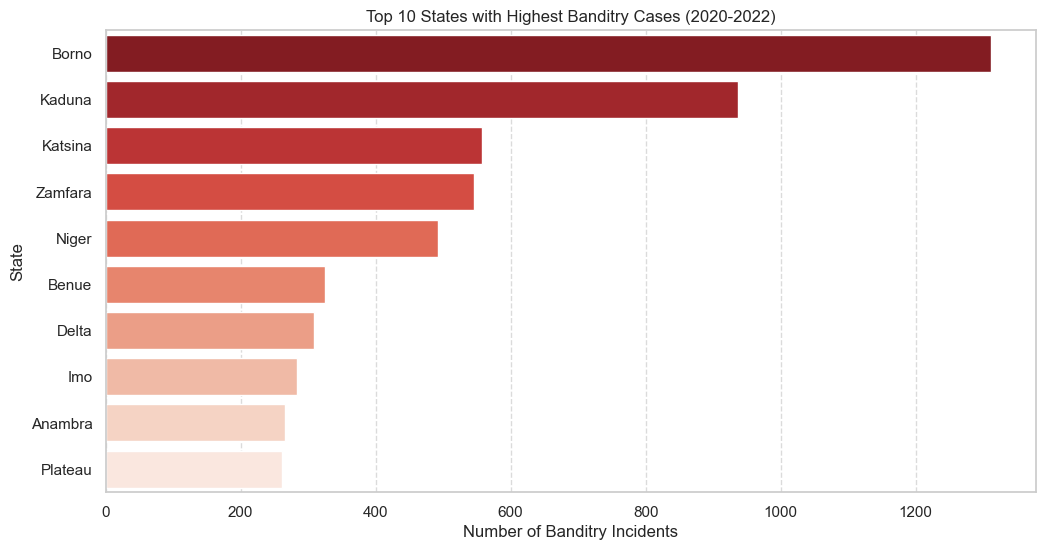

In [152]:

# Plot Top 10 States with Highest Banditry Cases
plt.figure(figsize=(12, 6))
sns.barplot(data=top_banditry_states, x="Banditry_Incidents", y="STATE", palette="Reds_r")
plt.xlabel("Number of Banditry Incidents")
plt.ylabel("State")
plt.title("Top 10 States with Highest Banditry Cases (2020-2022)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**✅Line plot showing trends per state (2013-2023).**

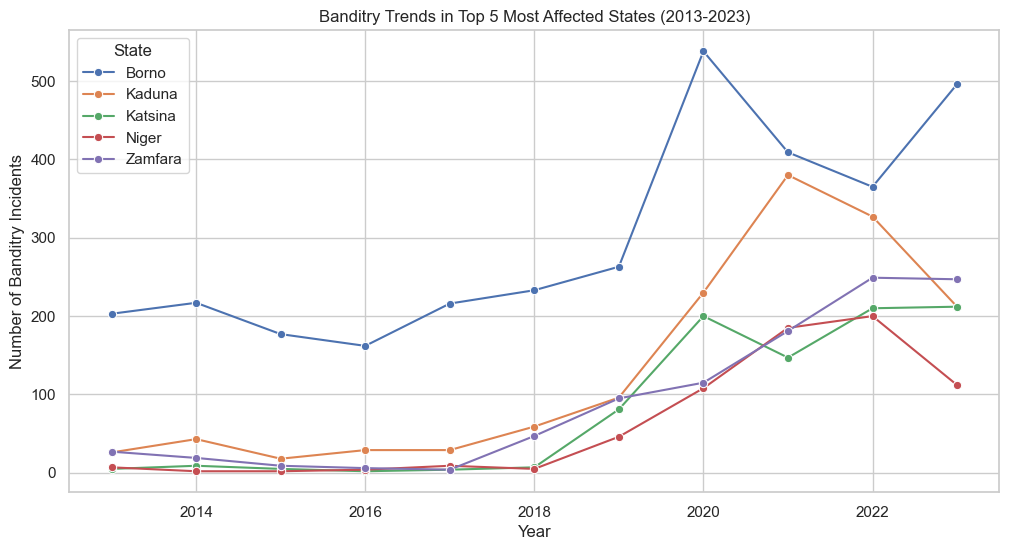

In [153]:
# Select top 5 most affected states
top_states = banditry_states.sort_values(by="Banditry_Incidents", ascending=False).head(5)["STATE"].tolist()

# Filter dataset for only these states
top_states_df = banditry_df[banditry_df["STATE"].isin(top_states)]

# Group by year and state
state_trends = top_states_df.groupby(["YEAR", "STATE"]).size().reset_index(name="Banditry_Incidents")

# Plot trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=state_trends, x="YEAR", y="Banditry_Incidents", hue="STATE", marker="o")

plt.xlabel("Year")
plt.ylabel("Number of Banditry Incidents")
plt.title("Banditry Trends in Top 5 Most Affected States (2013-2023)")
plt.legend(title="State")
plt.grid(True)
plt.show()


**✅Event_Type vs Fatalities Across states**

<Figure size 1400x700 with 0 Axes>

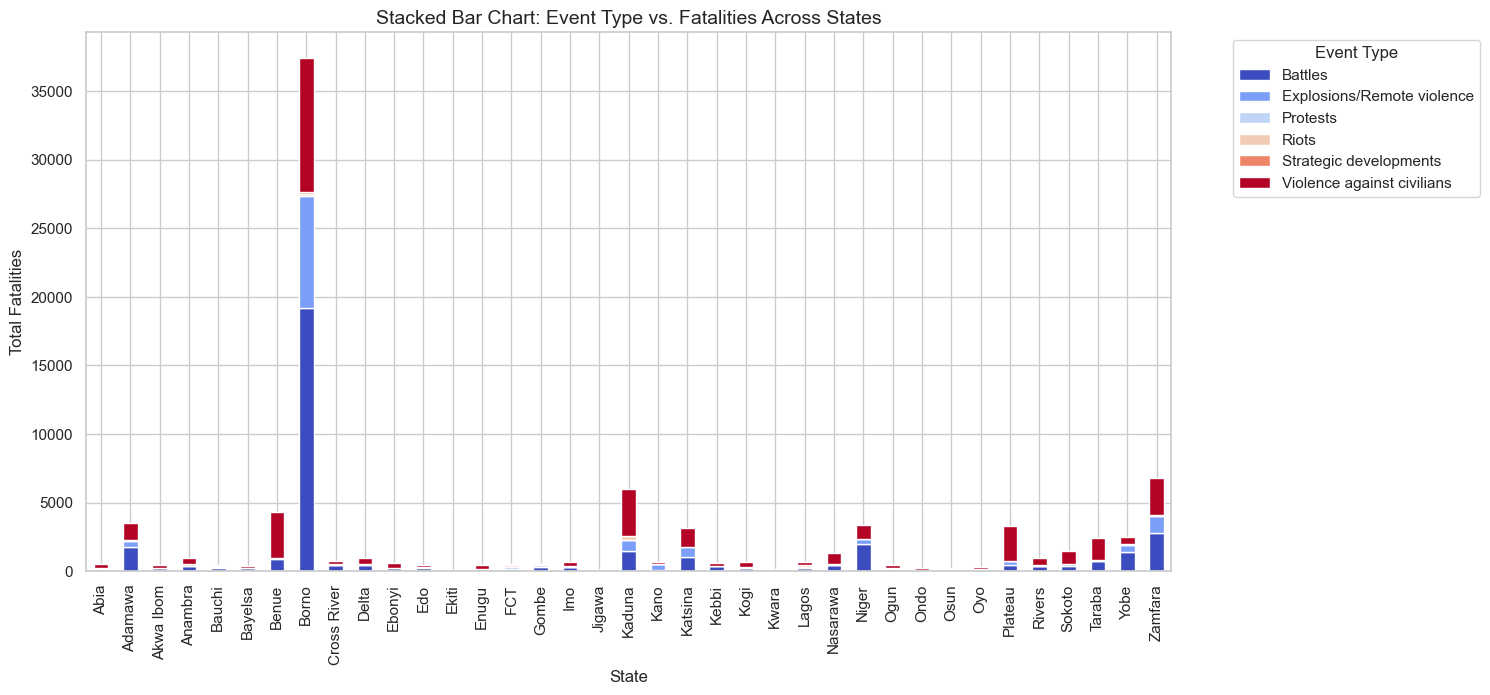

In [154]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# Aggregate fatalities by event type and state
event_fatalities = crimes_df.groupby(['STATE', 'EVENT_TYPE'])['FATALITIES'].sum().reset_index()

# Pivot data for stacked bar chart
event_fatalities_pivot = event_fatalities.pivot(index='STATE', columns='EVENT_TYPE', values='FATALITIES').fillna(0)

# Set figure size
plt.figure(figsize=(14, 7))

# Create stacked bar chart
event_fatalities_pivot.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 7))

# Add title and labels
plt.title("Stacked Bar Chart: Event Type vs. Fatalities Across States", fontsize=14)
plt.xlabel("State")
plt.ylabel("Total Fatalities")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend outside the plot
plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


## **🔍Key Insight**

1️⃣ Borno Remains the Epicenter of Banditry – Borno consistently reported the highest banditry incidents, peaking sharply in 2020 (527 cases) before slightly stabilizing. This suggests a link between insurgency and banditry activities, as Borno has been a hotspot for both.

2️⃣ Kaduna's Sharp Increase in 2020-2021 – From relatively low levels (below 100 cases per year before 2019), Kaduna's banditry cases skyrocketed to 230 in 2020 and 382 in 2021, indicating an intensification of armed group activities in the region.

3️⃣ Katsina, Niger, and Zamfara Saw a 2020-2022 Surge – All three states experienced a notable rise in 2020, with Katsina (202 cases), Niger (109 cases), and Zamfara (116 cases). This suggests a regional spillover effect, where banditry groups expanded operations beyond their initial strongholds.

4️⃣ Banditry Activity Remains High Despite 2023 Fluctuations – While some states saw a slight drop in 2022, banditry incidents in 2023 remained high, especially in Katsina (226 cases) and Zamfara (252 cases). This suggests that even if security measures have had some effect, the overall threat persists.

**📌Possible Causes of the 2020-2022 sharp rise:**

- COVID-19 economic impact may have worsened poverty and driven more people into crime.

- Security challenges and displacement could have allowed banditry networks to expand.
- Weapons proliferation and political instability might have escalated conflicts.

## **📊 D. LGA-Level Banditry Analysis**

**Identify LGAs with the highest  banditry crime rate over the years**

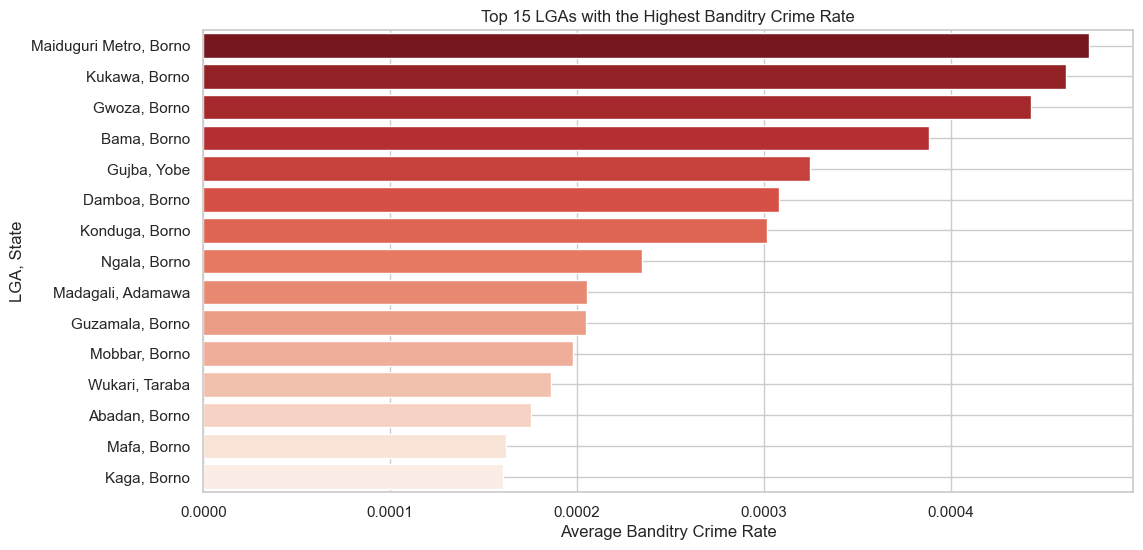

In [155]:
# Identify LGAs with the highest *average* banditry crime rate over the years
top_banditry_hotspots = banditry_df.groupby(['STATE', 'LGA'])['CRIME RATE'].sum().nlargest(15).reset_index()




# # Filter dataset to only banditry-related incidents
# banditry_df = crimes_df[crimes_df['IS_BANDITRY'] == 1]

# Aggregate banditry crime counts per LGA and year
lga_banditry_trends = banditry_df.groupby(['STATE', 'LGA', 'YEAR'])['CRIME RATE'].sum().reset_index()

# # Identify the top 10 LGAs with the highest total banditry incidents
# top_banditry_lgas = lga_banditry_trends.groupby(['STATE', 'LGA'])['CRIME RATE'].sum().nlargest(10).reset_index()


# Bar plot for top 15 LGAs with highest average banditry crime rates
plt.figure(figsize=(12, 6))
sns.barplot(x=top_banditry_hotspots['CRIME RATE'], y=top_banditry_hotspots.apply(lambda row: f"{row['LGA']}, {row['STATE']}", axis=1),
            palette='Reds_r')
plt.xlabel('Average Banditry Crime Rate')
plt.ylabel('LGA, State')
plt.title('Top 15 LGAs with the Highest Banditry Crime Rate')
plt.grid(True)
plt.show()


**✅Crime Trends Over Time (LGA-Level)**

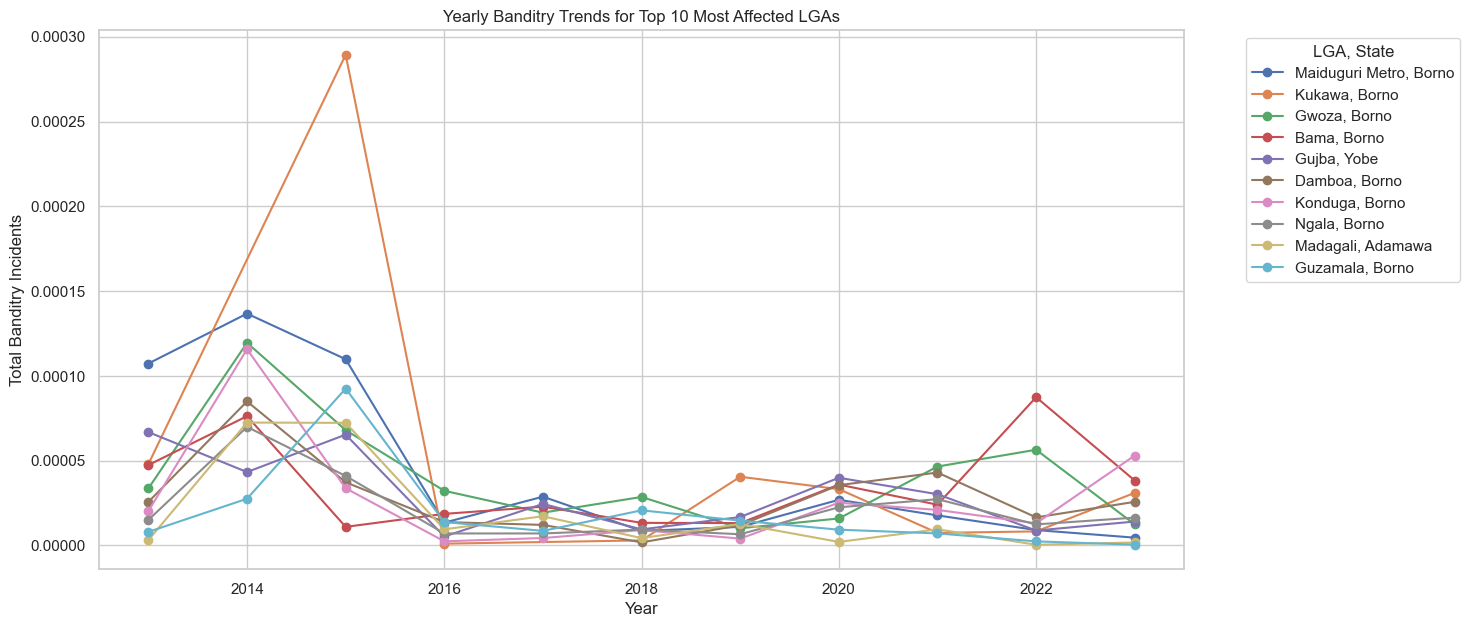

In [156]:

# Filter dataset to only banditry-related incidents
banditry_df = crimes_df[crimes_df['IS_BANDITRY'] == 1]

# Aggregate banditry crime counts per LGA and year
lga_banditry_trends = banditry_df.groupby(['STATE', 'LGA', 'YEAR'])['CRIME RATE'].sum().reset_index()

# Identify the top 10 LGAs with the highest total banditry incidents
top_banditry_lgas = lga_banditry_trends.groupby(['STATE', 'LGA'])['CRIME RATE'].sum().nlargest(10).reset_index()

# Plot trends for these LGAs
plt.figure(figsize=(14, 7))
for _, row in top_banditry_lgas.iterrows():
    lga_name = row['LGA']
    state_name = row['STATE']
    subset = lga_banditry_trends[(lga_banditry_trends['STATE'] == state_name) & 
                                 (lga_banditry_trends['LGA'] == lga_name)]
    
    plt.plot(subset['YEAR'], subset['CRIME RATE'], marker='o', label=f"{lga_name}, {state_name}")

plt.xlabel('Year')
plt.ylabel('Total Banditry Incidents')
plt.title('Yearly Banditry Trends for Top 10 Most Affected LGAs')
plt.legend(title="LGA, State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [157]:
top_banditry_lgas

STATE              LGA  CRIME RATE
0    Borno  Maiduguri Metro    0.000474
1    Borno           Kukawa    0.000462
2    Borno            Gwoza    0.000443
3    Borno             Bama    0.000388
4     Yobe            Gujba    0.000324
5    Borno           Damboa    0.000308
6    Borno          Konduga    0.000302
7    Borno            Ngala    0.000235
8  Adamawa         Madagali    0.000205
9    Borno         Guzamala    0.000205

### **🔍Key Insight**

1️⃣ Borno Leads in Crime Incidents – 8 out of the top 10 crime-affected LGAs are in Borno, with Maiduguri Metro, Kukawa, and Gwoza ranking highest.

2️⃣ Regional Spread – Yobe (Gujba) and Adamawa (Madagali) also have high crime rates, indicating spillover from Borno’s crisis.

3️⃣ Conflict Hotspots – These LGAs are long-term violence zones, largely due to insurgency, banditry, and unresolved security challenges.

4️⃣ Predictive Modeling Insight – Crime persistence in these LGAs suggests that historical data, poverty, and socioeconomic factors are key predictive indicators.

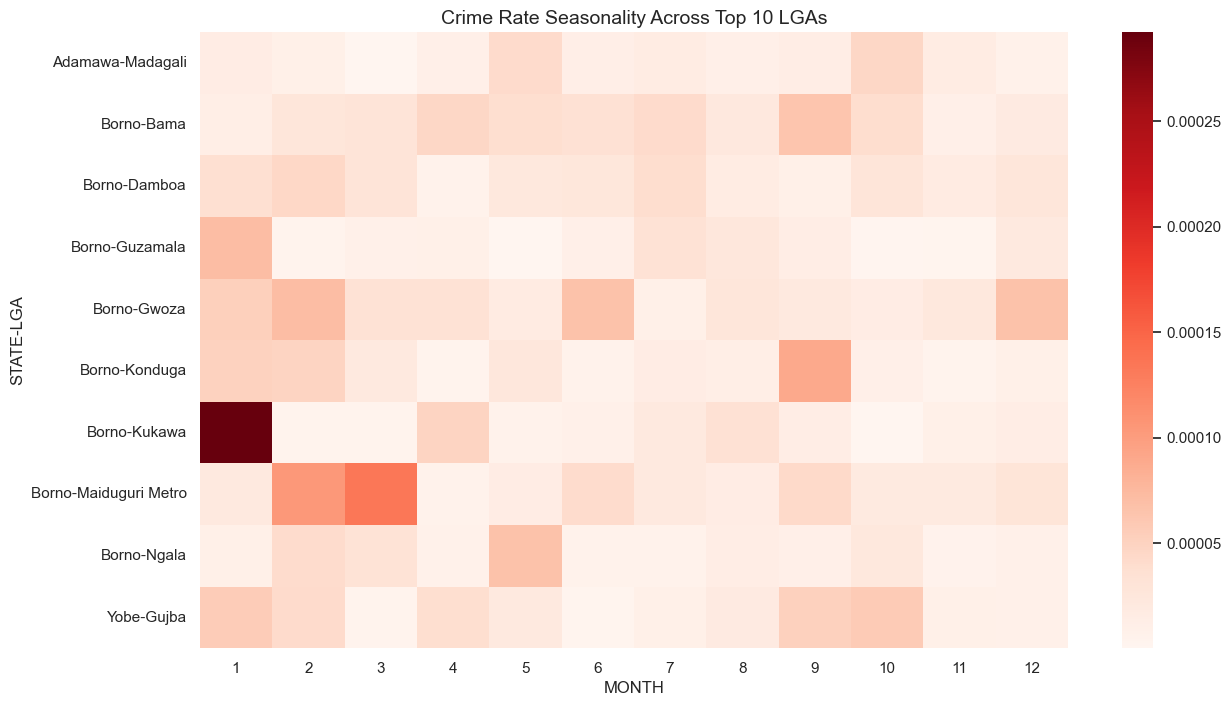

In [158]:
# Aggregate monthly banditry crime counts per LGA
lga_banditry_monthly = banditry_df.groupby(['STATE', 'LGA', 'MONTH'])['CRIME RATE'].sum().reset_index()

# Get monthly trends for the same top 10 LGAs
top_lga_banditry_monthly = lga_banditry_monthly[lga_banditry_monthly.set_index(['STATE', 'LGA']).index.isin(
    top_banditry_lgas.set_index(['STATE', 'LGA']).index
)]


month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
# Create a heatmap to visualize monthly trends
crime_pivot = top_lga_banditry_monthly.pivot_table(index=['STATE', 'LGA'], columns='MONTH', values='CRIME RATE')

plt.figure(figsize=(14, 8))
sns.heatmap(crime_pivot, cmap='Reds', annot=False)


# Set axis labels
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("LGA", fontsize=12)
ax.set_xticklabels(month_labels, rotation=45)  # Use month labels instead of numbers

plt.title("Crime Rate Seasonality Across Top 10 LGAs", fontsize=14)
plt.show()

## **🔍Key Insights from the Heatmap**
- Seasonal Crime Fluctuations – Crime rates in some LGAs peak in specific months, e.g., Maiduguri Metro (March) and Kukawa (January).

- LGAs with Consistent High Crime – Areas like Gwoza, Bama, and Guzamala have relatively high crime rates across multiple months, showing persistent insecurity.

- Spikes in Certain Periods – Some LGAs experience crime spikes at particular times, such as Guzamala (January), Kukawa (April), and Ngala (February).

- Security Planning Implications – These seasonal trends can help security agencies predict and prepare for crime surges in high-risk months.

**Identify LGAs with the highest *average* banditry crime rate over the years**

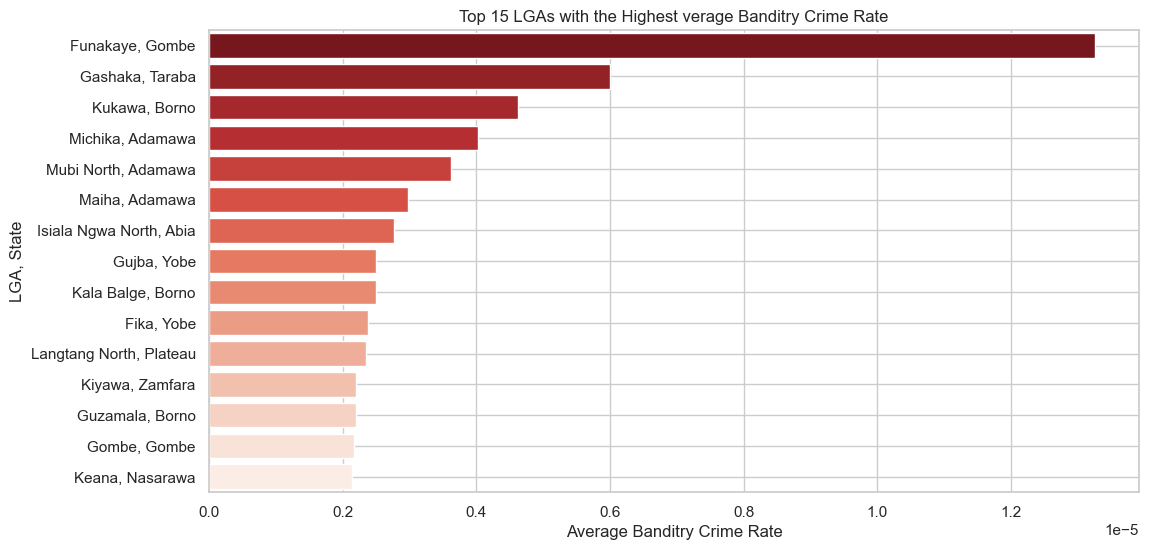

In [159]:
# Identify LGAs with the highest *average* banditry crime rate over the years
top_banditry_hotspots = banditry_df.groupby(['STATE', 'LGA'])['CRIME RATE'].mean().nlargest(15).reset_index()

# Bar plot for top 15 LGAs with highest average banditry crime rates
plt.figure(figsize=(12, 6))
sns.barplot(x=top_banditry_hotspots['CRIME RATE'], y=top_banditry_hotspots.apply(lambda row: f"{row['LGA']}, {row['STATE']}", axis=1),
            palette='Reds_r')
plt.xlabel('Average Banditry Crime Rate')
plt.ylabel('LGA, State')
plt.title('Top 15 LGAs with the Highest verage Banditry Crime Rate')
plt.grid(True)
plt.show()


## **📊 E. Event-Type & Sub-Event Trend Analysis**

**✅ Check the Most Dangerous Event Types**

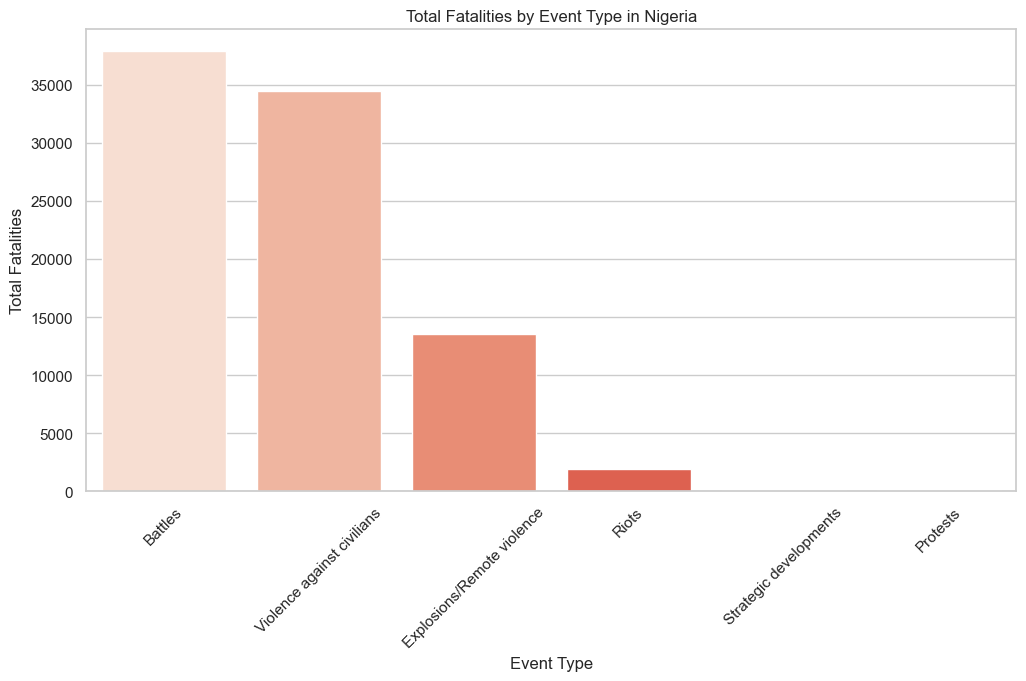

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum fatalities by event type
fatalities_by_event = event_fatalities.groupby('EVENT_TYPE')['FATALITIES'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12,6))
sns.barplot(x=fatalities_by_event.index, y=fatalities_by_event.values, palette='Reds')
plt.xticks(rotation=45)
plt.xlabel("Event Type")
plt.ylabel("Total Fatalities")
plt.title("Total Fatalities by Event Type in Nigeria")
plt.show()


**✅Trends for different crime event types over time.**

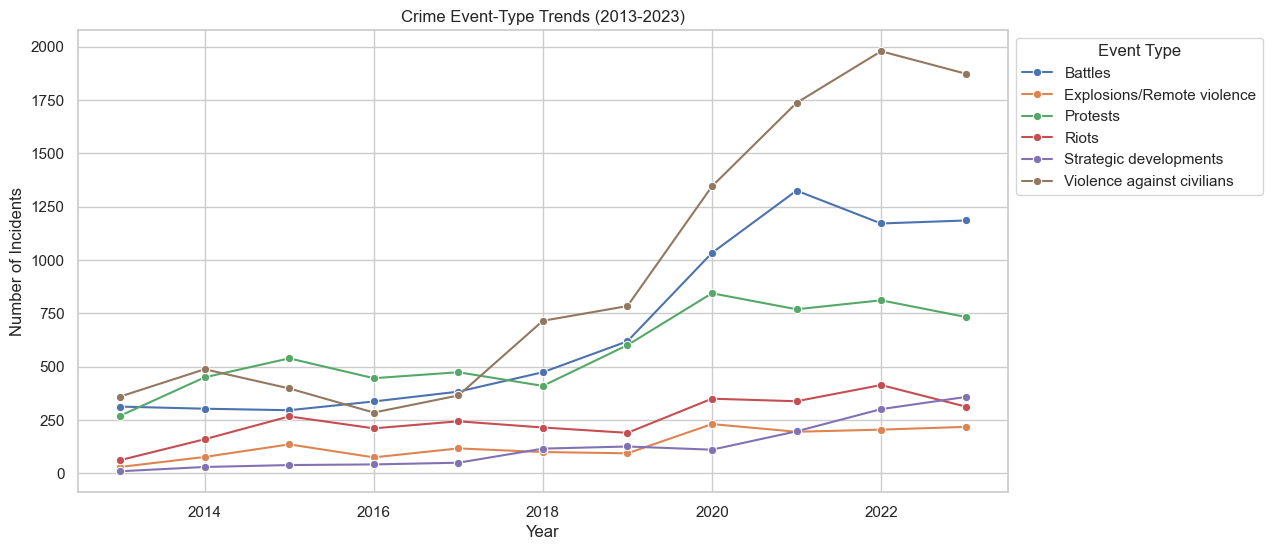

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the dataset by YEAR and EVENT_TYPE to count occurrences
event_trends = crimes_df.groupby(["YEAR", "EVENT_TYPE"]).size().reset_index(name="Count")

# Plot the event-type trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=event_trends, x="YEAR", y="Count", hue="EVENT_TYPE", marker="o")
plt.title("Crime Event-Type Trends (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Event Type", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


**✅Banditry-Related Sub-Event Trends**

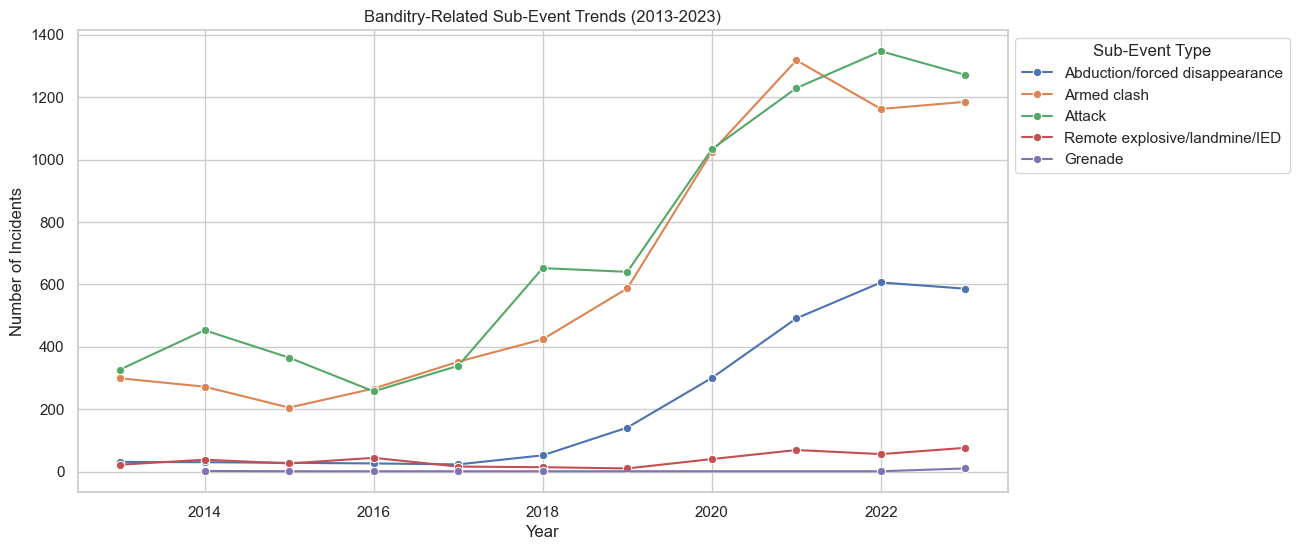

In [162]:
# Define sub-events that are most likely related to banditry
banditry_subevents = crimes_df[crimes_df['IS_BANDITRY']==1]['SUB_EVENT_TYPE'].unique()

# Filter dataset for banditry-related sub-events
sub_event_trends = crimes_df[crimes_df["SUB_EVENT_TYPE"].isin(banditry_subevents)]
sub_event_trends = sub_event_trends.groupby(["YEAR", "SUB_EVENT_TYPE"]).size().reset_index(name="Count")

# Plot the sub-event trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sub_event_trends, x="YEAR", y="Count", hue="SUB_EVENT_TYPE", marker="o")
plt.title("Banditry-Related Sub-Event Trends (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Sub-Event Type", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


## **📊 F. Geospatial Crime Hotspots (State & LGA-Level Maps)**

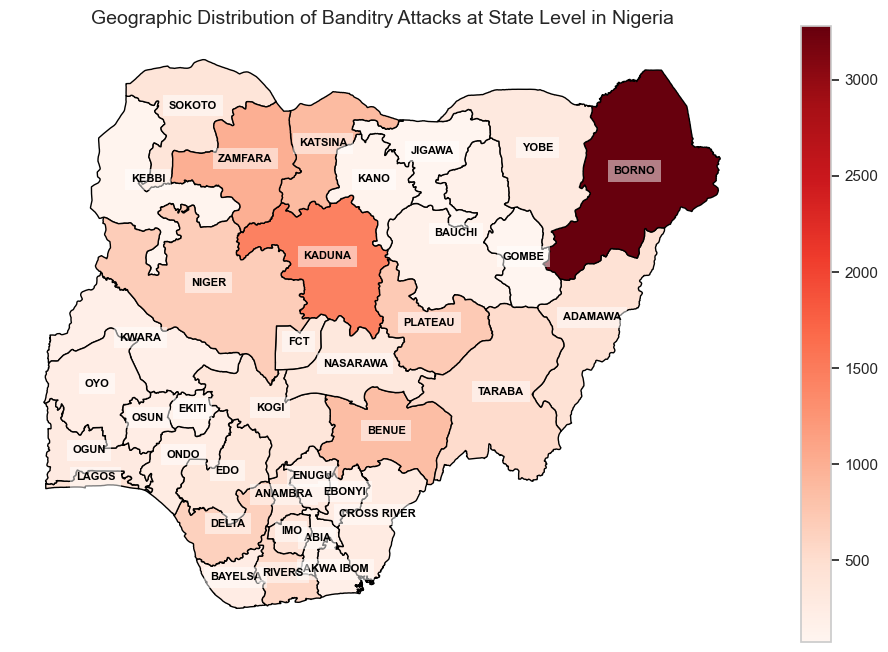

In [163]:
# ----------------------------
# Part A: Heatmap of Exact Banditry Incident Locations
# ----------------------------
# Filter for banditry incidents from your main dataset (crimes_df)
banditry_df = crimes_df[crimes_df["IS_BANDITRY"] == 1]

# # Create a base Folium map centered on Nigeria
# lga_map = folium.Map(location=[9.082, 8.6753], zoom_start=6)

# # Prepare heat data from the banditry incidents (latitude and longitude)
# heat_data = banditry_df[['LATITUDE', 'LONGITUDE']].dropna().values.tolist()

# # Add a HeatMap layer to the map
# HeatMap(heat_data, radius=10, blur=15).add_to(lga_map)

# # Display the map inline (in a Jupyter Notebook, simply outputting lga_map will render it)
# lga_map

# ----------------------------
# Part B: Choropleth Map of Banditry Incidents at the State Level with Labels
# ----------------------------

# Load Nigeria State boundaries shapefile
# Update the file path to your State shapefile
nigeria_states = gpd.read_file(r"C:\Users\acer\Documents\PROJECTS\New folder\Feburary2025\NG-CRIME-HOTSPOT\Data-collection\data\Clean_Data\nga_adm_osgof_20190417\nga_admbnda_adm1_osgof_20190417.shp")

# Aggregate banditry incidents by State from the filtered dataset
# (Assuming the column "STATE" in crimes_df corresponds to the State names)
banditry_counts = banditry_df.groupby("STATE").size().reset_index(name="BANDITRY_COUNT")

# Standardize State names in both datasets for a successful merge
banditry_counts["STATE"] = banditry_counts["STATE"].str.strip().str.upper()
nigeria_states["ADM1_EN"] = nigeria_states["ADM1_EN"].str.strip().str.upper()

# Replace 'Federal Capital Territory' with 'FCT' if necessary
nigeria_states.replace('FEDERAL CAPITAL TERRITORY', 'FCT', inplace=True)

# Merge the banditry counts with the State shapefile based on State names
nigeria_states = nigeria_states.merge(banditry_counts, left_on="ADM1_EN", right_on="STATE", how="left").fillna(0)

# Create a choropleth map using GeoPandas and Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
nigeria_states.plot(column="BANDITRY_COUNT", cmap="Reds", edgecolor="black", legend=True, ax=ax)
ax.set_title("Geographic Distribution of Banditry Attacks at State Level in Nigeria", fontsize=14)
ax.axis("off")  # Remove axes for a cleaner look

# Overlay State labels on the map
for idx, row in nigeria_states.iterrows():
    # Calculate the centroid for label placement
    centroid = row.geometry.centroid
    # Use the full State name for clarity
    plt.text(centroid.x, centroid.y, row.ADM1_EN, fontsize=8,
             ha='center', color='black', weight='bold',
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.show()

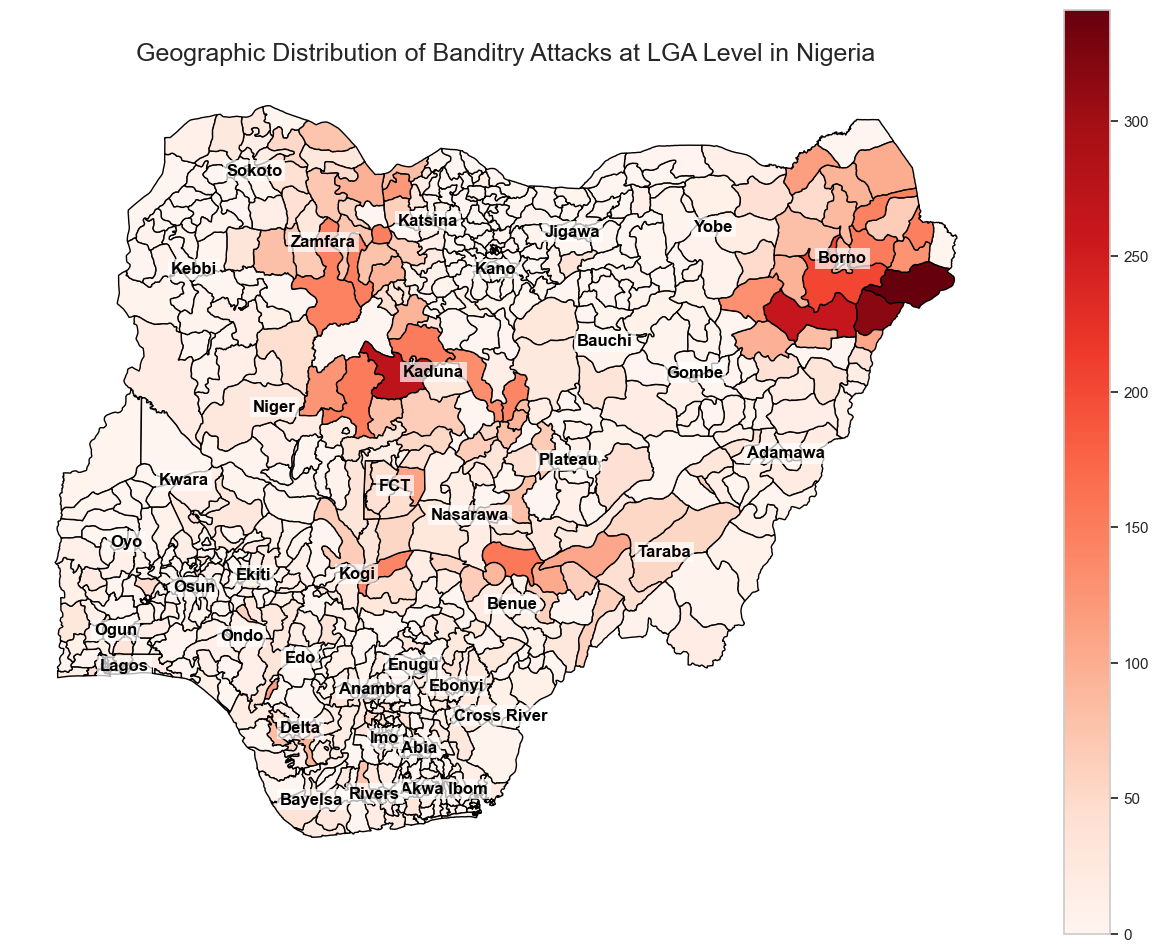

In [164]:


# ----------------------------
# Load Nigeria LGA Boundaries Shapefile
# ----------------------------
nigeria_lga = gpd.read_file(
    r"C:\Users\acer\Documents\PROJECTS\New folder\Feburary2025\NG-CRIME-HOTSPOT\Data-collection\data\Clean_Data\nga_adm_osgof_20190417\nga_admbnda_adm2_osgof_20190417.shp"
)

# ----------------------------
# Aggregate Banditry Incidents by LGA
# ----------------------------
# (Assuming banditry_df is already defined from your crimes_df, filtered for IS_BANDITRY==1)
banditry_counts = banditry_df.groupby("LGA").size().reset_index(name="BANDITRY_COUNT")

# Standardize LGA names in both datasets for a successful merge
banditry_counts["LGA"] = banditry_counts["LGA"].str.strip().str.upper()
nigeria_lga["ADM2_EN"] = nigeria_lga["ADM2_EN"].str.strip().str.upper()


# Replace 'Federal Capital Territory' with 'FCT' if necessary
nigeria_lga.replace('Federal Capital Territory', 'FCT', inplace=True)
# Merge the banditry counts with the LGA shapefile based on LGA names
nigeria_lga = nigeria_lga.merge(banditry_counts, left_on="ADM2_EN", right_on="LGA", how="left").fillna(0)
# Replace 'Federal Capital Territory' with 'FCT' if necessary

# ----------------------------
# Create a Choropleth Map Using GeoPandas & Matplotlib
# ----------------------------
fig, ax = plt.subplots(figsize=(16, 12))
nigeria_lga.plot(column="BANDITRY_COUNT", cmap="Reds", edgecolor="black", legend=True, ax=ax)
ax.set_title("Geographic Distribution of Banditry Attacks at LGA Level in Nigeria", fontsize=18)
ax.axis("off")  # Remove axes for a cleaner look

# ----------------------------
# Overlay State Labels (Only State Names)
# ----------------------------
# Dissolve the LGA geometries by state to get a single geometry per state
states = nigeria_lga.dissolve(by="ADM1_EN", as_index=False)

# Add state labels at the centroid of each dissolved state geometry
for idx, row in states.iterrows():
    centroid = row.geometry.centroid
    plt.text(
        centroid.x, centroid.y,
        row.ADM1_EN,  # Full state name
        fontsize=12,
        ha='center', va='center',
        color='black', weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2)
    )

plt.show()


## **🔍Key Insight**

1️⃣ The geographic map confirms the top crime states. Borno is the darkest red, meaning it has the highest crime intensity.Kaduna, Zamfara, Katsina, and Niger also appear very dark, reinforcing their role as major crime hubs Also Benue,Delta and Plateau also stands out, suggesting it may have high conflict-driven violence.

2️⃣ Most high-crime states are in the North (Northeast & Northwest). Few southern states appear in light red, showing banditry is regionally concentrated.

 

## **📊 G. Socioeconomic Impact on Banditry**

**✅Trends of Socioeconomic Factors Over Time**

In [165]:
banditry_df=crimes_df[crimes_df['IS_BANDITRY']==1]

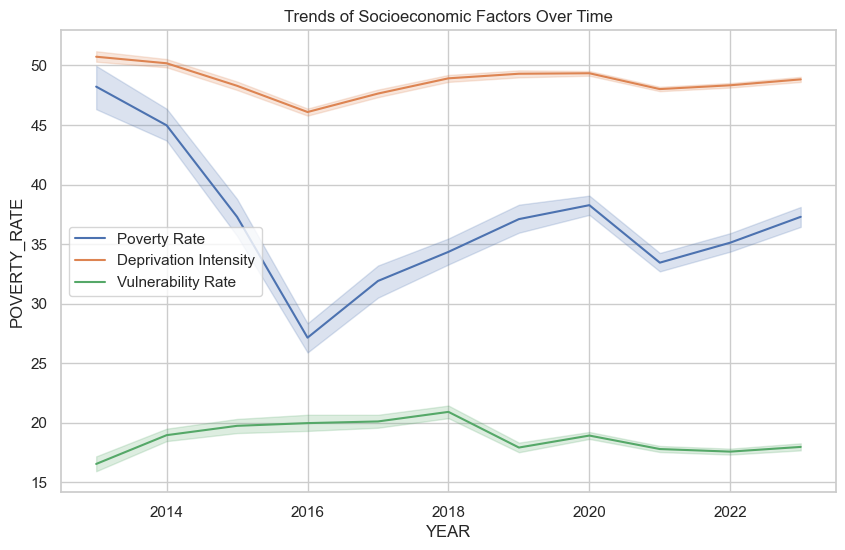

In [166]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='POVERTY_RATE', data=banditry_df, label='Poverty Rate')
sns.lineplot(x='YEAR', y='DEPRIVATION_INTENSITY', data=banditry_df, label='Deprivation Intensity')
sns.lineplot(x='YEAR', y='VULNERABILITY_RATE', data=banditry_df, label='Vulnerability Rate')
plt.title('Trends of Socioeconomic Factors Over Time')
plt.legend()
plt.show()


**✅Trends of Socioeconomic Factors in highest banditry states(2013-2023)**

In [167]:
import matplotlib.pyplot as plt

# List of high-banditry states (adjust based on your data)
high_banditry_states = top_states_df.STATE.unique().tolist()

# Filter the data for these states
df_high_banditry = crimes_df[crimes_df['STATE'].isin(high_banditry_states)]

# Group by year and calculate the average socioeconomic indicators
socioeconomic_trends = df_high_banditry.groupby('YEAR')[['POVERTY_RATE', 'DEPRIVATION_INTENSITY', 'VULNERABILITY_RATE']].mean()

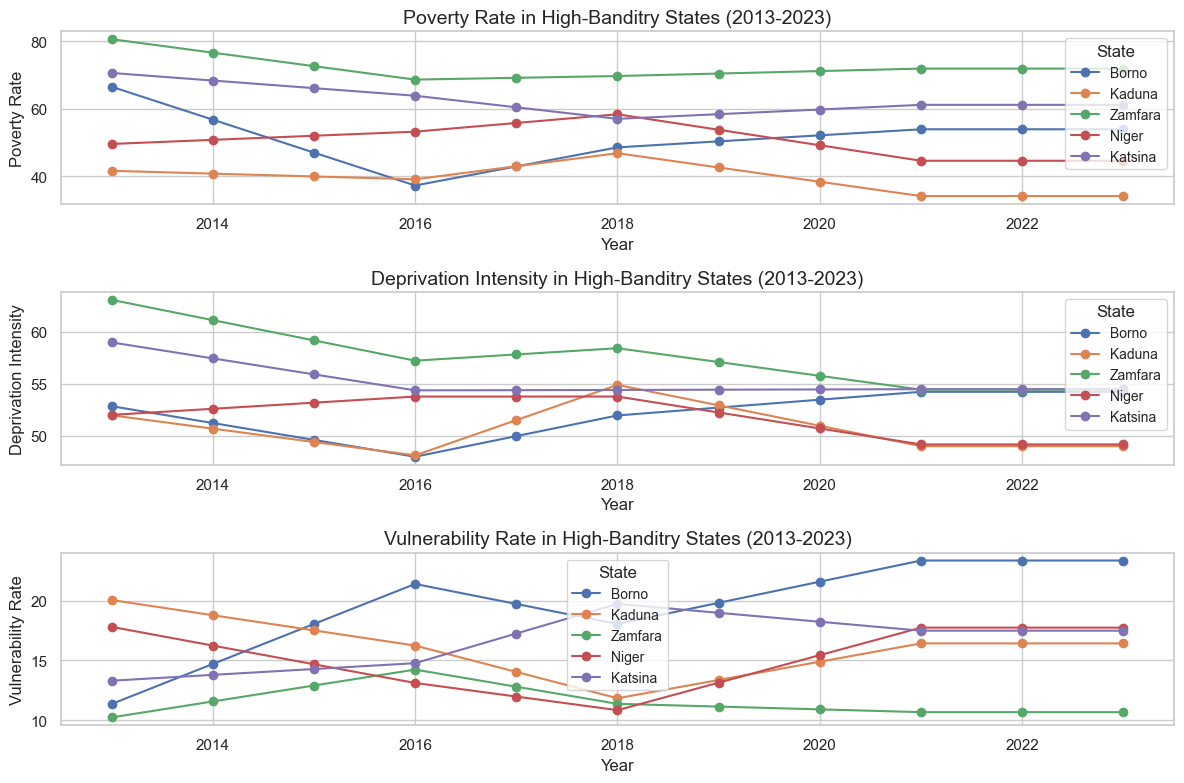

In [168]:
# Filter the data for high-banditry states
df_high_banditry = crimes_df[crimes_df['STATE'].isin(high_banditry_states)]

# Group by year and state, then calculate the average socioeconomic indicators
socioeconomic_trends_by_state = df_high_banditry.groupby(['YEAR', 'STATE'])[['POVERTY_RATE', 'DEPRIVATION_INTENSITY', 'VULNERABILITY_RATE']].mean().reset_index()

# Plot the trends for each indicator by state
plt.figure(figsize=(12, 8))

# Plot Poverty Rate for each state
plt.subplot(3, 1, 1)
for state in high_banditry_states:
    state_data = socioeconomic_trends_by_state[socioeconomic_trends_by_state['STATE'] == state]
    plt.plot(state_data['YEAR'], state_data['POVERTY_RATE'], marker='o', label=state)
plt.title('Poverty Rate in High-Banditry States (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Poverty Rate', fontsize=12)
plt.legend(title='State', fontsize=10)

# Plot Deprivation Intensity for each state
plt.subplot(3, 1, 2)
for state in high_banditry_states:
    state_data = socioeconomic_trends_by_state[socioeconomic_trends_by_state['STATE'] == state]
    plt.plot(state_data['YEAR'], state_data['DEPRIVATION_INTENSITY'], marker='o', label=state)
plt.title('Deprivation Intensity in High-Banditry States (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deprivation Intensity', fontsize=12)
plt.legend(title='State', fontsize=10)

# Plot Vulnerability Rate for each state
plt.subplot(3, 1, 3)
for state in high_banditry_states:
    state_data = socioeconomic_trends_by_state[socioeconomic_trends_by_state['STATE'] == state]
    plt.plot(state_data['YEAR'], state_data['VULNERABILITY_RATE'], marker='o', label=state)
plt.title('Vulnerability Rate in High-Banditry States (2013-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Vulnerability Rate', fontsize=12)
plt.legend(title='State', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


**✅let look at the impact of COVID-19(2019-2022)**

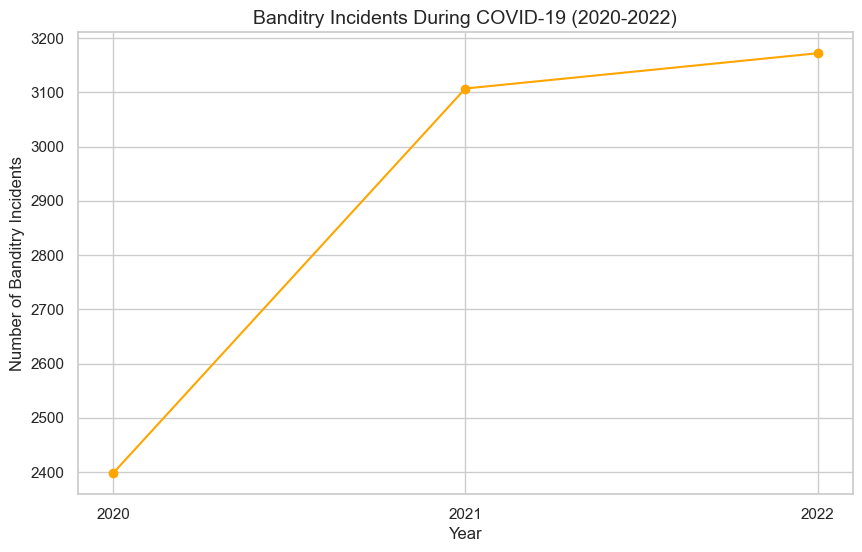

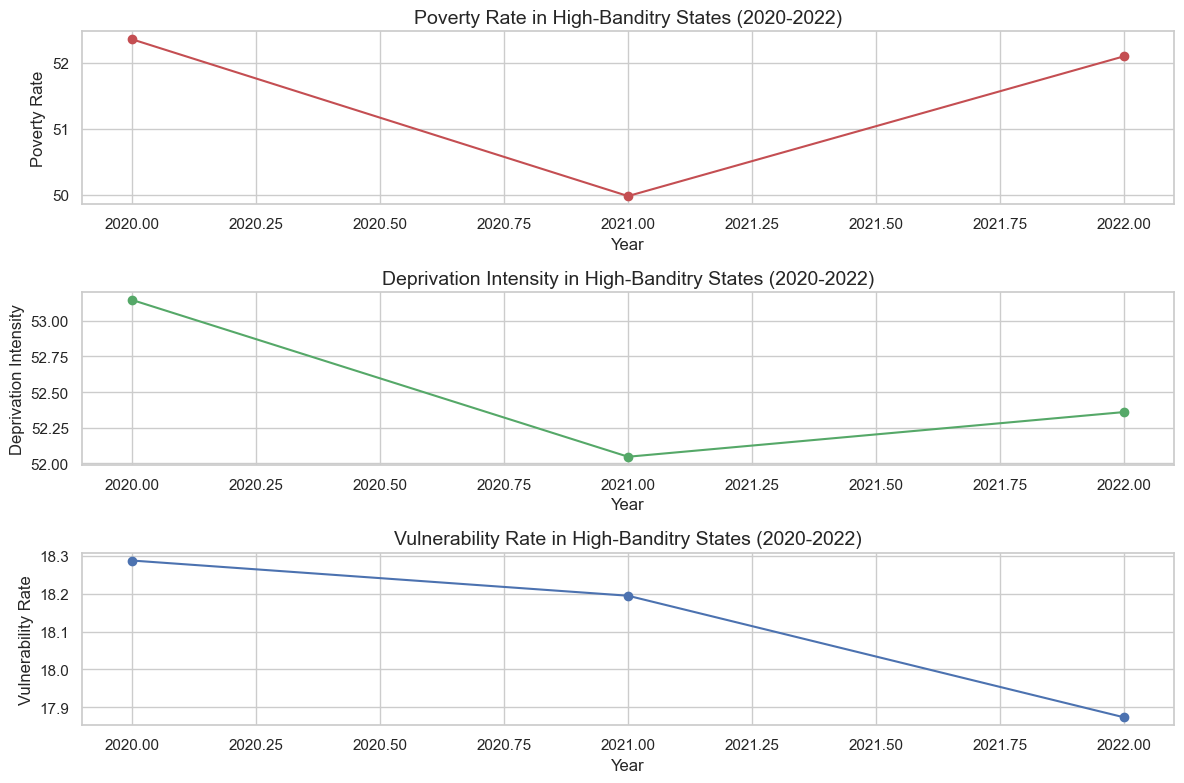

In [169]:
# Filter for banditry incidents between 2020 and 2022
df_banditry_2020_2022 = banditry_df[(banditry_df['YEAR'] >= 2020) & (banditry_df['YEAR'] <= 2022)]

# Group by year and count the number of incidents
banditry_2020_2022 = df_banditry_2020_2022.groupby('YEAR')['IS_BANDITRY'].count()

# Plot the banditry incidents during COVID-19 (2020-2022)
plt.figure(figsize=(10, 6))
plt.plot(banditry_2020_2022.index, banditry_2020_2022.values, marker='o', linestyle='-', color='orange')
plt.title('Banditry Incidents During COVID-19 (2020-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Banditry Incidents', fontsize=12)
plt.xticks(range(2020, 2023))
plt.grid(True)
plt.show()

# Filter socioeconomic data for 2020-2022 for high-banditry states
df_high_banditry_2020_2022 = df_high_banditry[(df_high_banditry['YEAR'] >= 2020) & (df_high_banditry['YEAR'] <= 2022)]

# Group by year and calculate the average socioeconomic indicators
socioeconomic_trends_2020_2022 = df_high_banditry_2020_2022.groupby('YEAR')[['POVERTY_RATE', 'DEPRIVATION_INTENSITY', 'VULNERABILITY_RATE']].mean()

# Plot the socioeconomic trends for 2020-2022
plt.figure(figsize=(12, 8))

# Poverty Rate
plt.subplot(3, 1, 1)
plt.plot(socioeconomic_trends_2020_2022.index, socioeconomic_trends_2020_2022['POVERTY_RATE'], marker='o', color='r')
plt.title('Poverty Rate in High-Banditry States (2020-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Poverty Rate', fontsize=12)

# Deprivation Intensity
plt.subplot(3, 1, 2)
plt.plot(socioeconomic_trends_2020_2022.index, socioeconomic_trends_2020_2022['DEPRIVATION_INTENSITY'], marker='o', color='g')
plt.title('Deprivation Intensity in High-Banditry States (2020-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deprivation Intensity', fontsize=12)

# Vulnerability Rate
plt.subplot(3, 1, 3)
plt.plot(socioeconomic_trends_2020_2022.index, socioeconomic_trends_2020_2022['VULNERABILITY_RATE'], marker='o', color='b')
plt.title('Vulnerability Rate in High-Banditry States (2020-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Vulnerability Rate', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


**✅Correlation between poverty rate, deprivation, and banditry.**

In [170]:
banditry_df.select_dtypes(['int','float']).columns

Index(['YEAR', 'FATALITIES', 'LATITUDE', 'LONGITUDE', 'POPULATION',
       'CRIME RATE', 'POVERTY_RATE', 'DEPRIVATION_INTENSITY',
       'VULNERABILITY_RATE', 'SEVERE_POVERTY_RATE', 'STATE_AREA',
       'POPULATION_DENSITY', 'MONTH', 'IS_BANDITRY', 'IS_NON_BANDITRY',
       'LOG_FATALITIES', 'LOG_CRIME_RATE', 'LOG_POPULATION',
       'LOG_POPULATION_DENSITY'],
      dtype='object')

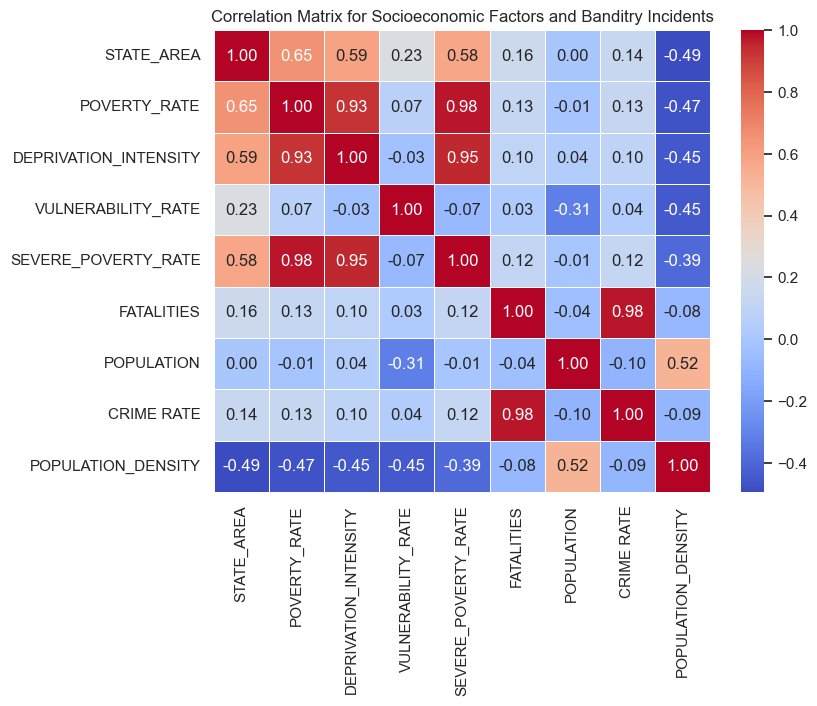

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter banditry data
banditry_data = crimes_df[crimes_df['IS_BANDITRY'] == 1]

# banditry_data['LOG_FATALITIES'] = np.log(banditry_data['FATALITIES'] + 1)

# Select relevant columns for correlation
columns_to_check = ['STATE_AREA','POVERTY_RATE', 'DEPRIVATION_INTENSITY', 'VULNERABILITY_RATE','SEVERE_POVERTY_RATE', 'FATALITIES','POPULATION', 'CRIME RATE','POPULATION_DENSITY']

# Correlation matrix for selected columns
correlation_matrix = banditry_df[columns_to_check].corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Socioeconomic Factors and Banditry Incidents')
plt.show()


**Key Insight**

- The rise in banditry incidents from 2020 to 2022 coincides with a slight increase in poverty and deprivation. This reinforces the idea that areas with economic hardship and weaker governance are more prone to banditry.

- Possible COVID-19 Impact: Despite a small drop in poverty from 2020 to 2021, the rise in 2022 coincides with a sharp increase in banditry incidents. This suggests that the combination of economic hardship from COVID-19, disrupted security, and the continued instability in rural regions could be contributing to the surge in crime.

- Vulnerability Rates: The vulnerability rate’s slight decrease might indicate that there were some efforts or interventions to address social challenges, but these were insufficient to significantly curb the rise in banditry.

**✅Correlation between banditry rate and socioeconomic Factors.**

In [172]:


# Group data by state and compute total crime incidents and banditry incidents
state_grouped = crimes_df.groupby(['STATE',]).agg(
    TOTAL_INCIDENTS=('IS_BANDITRY', 'count'),
    BANDITRY_INCIDENTS=('IS_BANDITRY', 'sum'),
    POVERTY_RATE=('POVERTY_RATE', 'mean'),
    DEPRIVATION_INTENSITY=('DEPRIVATION_INTENSITY', 'mean'),
    VULNERABILITY_RATE=('VULNERABILITY_RATE', 'mean'),
    SEVERE_POVERTY_RATE=('SEVERE_POVERTY_RATE', 'mean'),
    POPULATION=('POPULATION', 'sum'),
    POPULATION_DENSITY=('POPULATION_DENSITY', 'mean')  # Ensure this is calculated before
).reset_index()

# Calculate Banditry Rate
state_grouped['BANDITRY_RATE'] = state_grouped['BANDITRY_INCIDENTS'] / state_grouped['TOTAL_INCIDENTS']

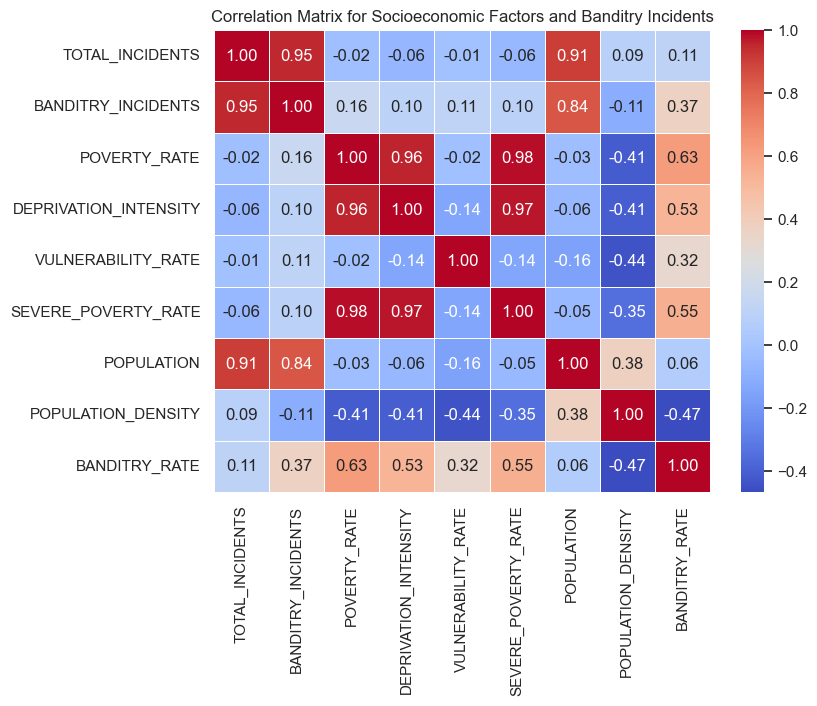

In [173]:

# Group data by state and compute total crime incidents and banditry incidents
state_grouped = crimes_df.groupby(['STATE',]).agg(
    TOTAL_INCIDENTS=('IS_BANDITRY', 'count'),
    BANDITRY_INCIDENTS=('IS_BANDITRY', 'sum'),
    POVERTY_RATE=('POVERTY_RATE', 'mean'),
    DEPRIVATION_INTENSITY=('DEPRIVATION_INTENSITY', 'mean'),
    VULNERABILITY_RATE=('VULNERABILITY_RATE', 'mean'),
    SEVERE_POVERTY_RATE=('SEVERE_POVERTY_RATE', 'mean'),
    POPULATION=('POPULATION', 'sum'),
    POPULATION_DENSITY=('POPULATION_DENSITY', 'mean')  # Ensure this is calculated before
).reset_index()

# Calculate Banditry Rate
state_grouped['BANDITRY_RATE'] = state_grouped['BANDITRY_INCIDENTS'] / state_grouped['TOTAL_INCIDENTS']
# Filter banditry data
banditry_data = crimes_df[crimes_df['IS_BANDITRY'] == 1]

# banditry_data['LOG_FATALITIES'] = np.log(banditry_data['FATALITIES'] + 1)

# Select relevant columns for correlation
columns_to_check = ['TOTAL_INCIDENTS', 'BANDITRY_INCIDENTS', 'POVERTY_RATE',
       'DEPRIVATION_INTENSITY', 'VULNERABILITY_RATE', 'SEVERE_POVERTY_RATE',
       'POPULATION', 'POPULATION_DENSITY', 'BANDITRY_RATE']

# Correlation matrix for selected columns
correlation_matrix = state_grouped[columns_to_check].corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Socioeconomic Factors and Banditry Incidents')
plt.show()

**✅Scatter plots showing relationships between banditry and variables like poverty, vulnerability, and population density.**


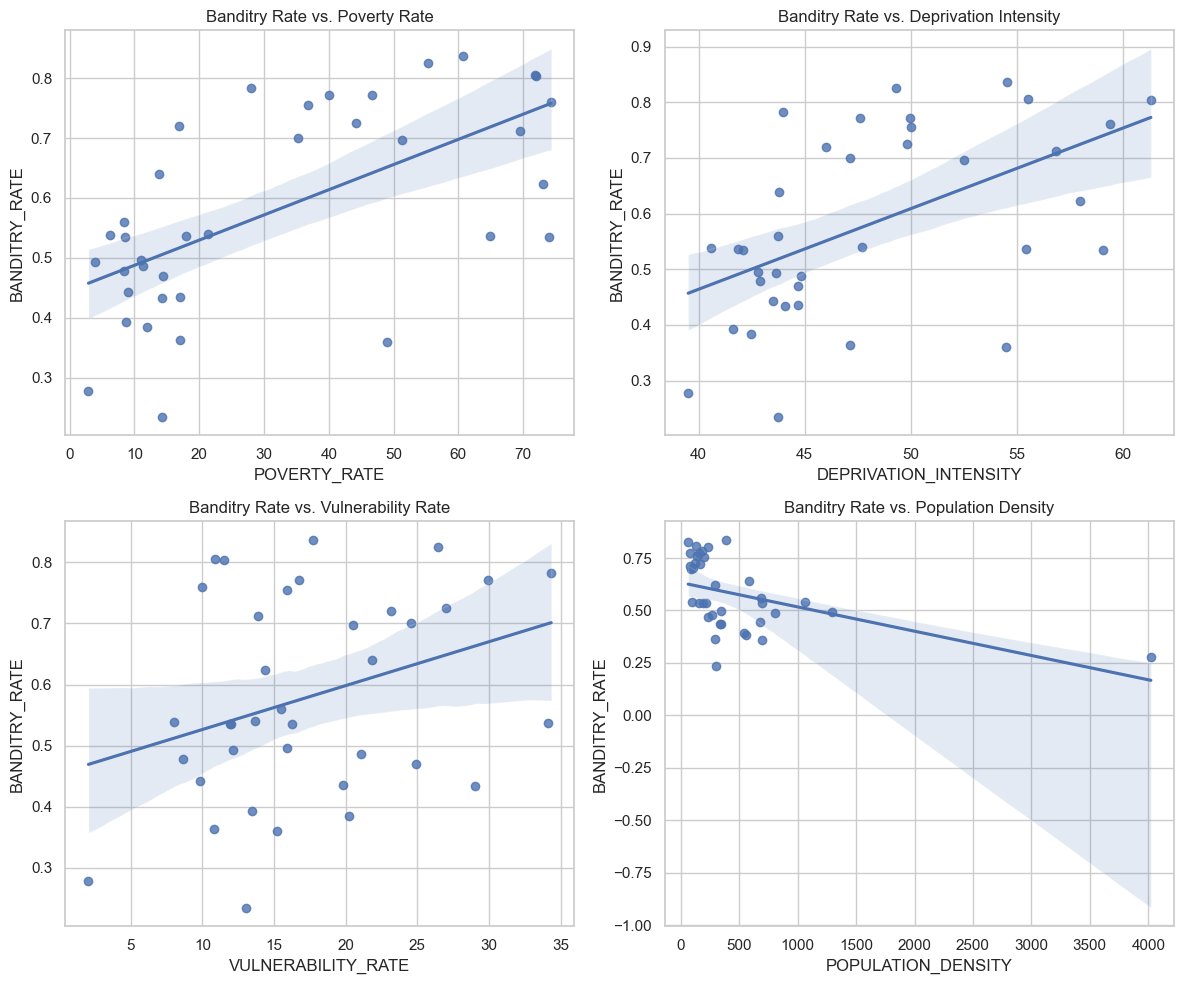

In [174]:


# Create scatter plots with regression lines
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(x='POVERTY_RATE', y='BANDITRY_RATE', data=state_grouped, ax=axes[0,0])
axes[0,0].set_title("Banditry Rate vs. Poverty Rate")

sns.regplot(x='DEPRIVATION_INTENSITY', y='BANDITRY_RATE', data=state_grouped, ax=axes[0,1])
axes[0,1].set_title("Banditry Rate vs. Deprivation Intensity")

sns.regplot(x='VULNERABILITY_RATE', y='BANDITRY_RATE', data=state_grouped, ax=axes[1,0])
axes[1,0].set_title("Banditry Rate vs. Vulnerability Rate")

sns.regplot(x='POPULATION_DENSITY', y='BANDITRY_RATE', data=state_grouped, ax=axes[1,1])
axes[1,1].set_title("Banditry Rate vs. Population Density")

plt.tight_layout()
plt.show()


## **🔍Key Insight**

1️⃣ High Banditry Rates in High-Poverty States. This confirms that poverty is a significant driver of banditry.

2️⃣ High deprivation also correlates with high banditry.

3️⃣ Vulnerability rate measures the likelihood of falling into poverty. with no exact strand, and the data is scattered. Therefore  chronic poverty, rather than vulnerability, might be a stronger banditry driver.

4️⃣ Some of the data Population  seems to have high population densities but low banditry rates (<0.55) at the same time some have a high banditry rate despite lower population density.



## **📌Conclusion**

- States with widespread poverty appear more vulnerable to banditry as an alternative means of survival.
- A lack of basic necessities (education, healthcare, and jobs) contributes to crime escalation.
- While vulnerability increases crime risk, it may not be the strongest predictor. Chronic poverty and deprivation appear more critical.
- 



# **3. Feature Engineering**

In [175]:
# Group data by state and compute total crime incidents and banditry incidents
state_grouped = crimes_df.groupby(['STATE',]).agg(
    TOTAL_INCIDENTS=('IS_BANDITRY', 'count'),
    BANDITRY_INCIDENTS=('IS_BANDITRY', 'sum'),
    POVERTY_RATE=('POVERTY_RATE', 'mean'),
    DEPRIVATION_INTENSITY=('DEPRIVATION_INTENSITY', 'mean'),
    VULNERABILITY_RATE=('VULNERABILITY_RATE', 'mean'),
    SEVERE_POVERTY_RATE=('SEVERE_POVERTY_RATE', 'mean'),
    POPULATION=('POPULATION', 'sum'),
    POPULATION_DENSITY=('POPULATION_DENSITY', 'mean')  # Ensure this is calculated before
).reset_index()

In [176]:
# Group data by state and compute total crime incidents and banditry incidents
LGA_grouped = crimes_df.groupby(['STATE','LGA']).agg(
    TOTAL_INCIDENTS=('IS_BANDITRY', 'count'),
    BANDITRY_INCIDENTS=('IS_BANDITRY', 'sum'),
    POVERTY_RATE=('POVERTY_RATE', 'mean'),
    DEPRIVATION_INTENSITY=('DEPRIVATION_INTENSITY', 'mean'),
    VULNERABILITY_RATE=('VULNERABILITY_RATE', 'mean'),
    SEVERE_POVERTY_RATE=('SEVERE_POVERTY_RATE', 'mean'),
    POPULATION=('POPULATION', 'sum'),
    POPULATION_DENSITY=('POPULATION_DENSITY', 'mean')  # Ensure this is calculated before
).reset_index()


LGA_grouped['BANDITRY_RATE'] = LGA_grouped['BANDITRY_INCIDENTS'] / LGA_grouped['TOTAL_INCIDENTS']


# **4. Data Mining & Predictive Modeling**

## **1. Clustering Analysis (Unsupervised Learning)**
- We can use K-Means Clustering or Hierarchical Clustering to group states based on crime and socioeconomic factors.
- Features like BANDITRY_INCIDENTS, POVERTY_RATE, DEPRIVATION_INTENSITY, and VULNERABILITY_RATE can help identify crime-prone clusters.
- This will help in profiling states into high-risk, medium-risk, and low-risk categories.

In [177]:

# Group data by state and compute total crime incidents and banditry incidents
state_merged_data = crimes_df.groupby(['STATE']).agg(
    TOTAL_INCIDENTS=('IS_BANDITRY', 'count'),
    BANDITRY_INCIDENTS=('IS_BANDITRY', 'sum'),
    POVERTY_RATE=('POVERTY_RATE', 'mean'),
    DEPRIVATION_INTENSITY=('DEPRIVATION_INTENSITY', 'mean'),
    VULNERABILITY_RATE=('VULNERABILITY_RATE', 'mean'),
    SEVERE_POVERTY_RATE=('SEVERE_POVERTY_RATE', 'mean'),
    POPULATION=('POPULATION', 'sum'),
    POPULATION_DENSITY=('POPULATION_DENSITY', 'mean')  # Ensure this is calculated before
).reset_index()

# Calculate Banditry Rate
state_merged_data['BANDITRY_RATE'] = state_merged_data['BANDITRY_INCIDENTS'] / state_merged_data['TOTAL_INCIDENTS']

### **📊 Data Preparation and Standardization**

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the features for clustering
features = ['BANDITRY_INCIDENTS', 'POVERTY_RATE', 'DEPRIVATION_INTENSITY', 
            'VULNERABILITY_RATE', 'POPULATION_DENSITY', 'SEVERE_POVERTY_RATE']

# Extract feature matrix
X = state_merged_data[features]

# Standardize the data (important for clustering since features have different scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### **📊 Determine the Optimal Number of Clusters (Elbow Method)**

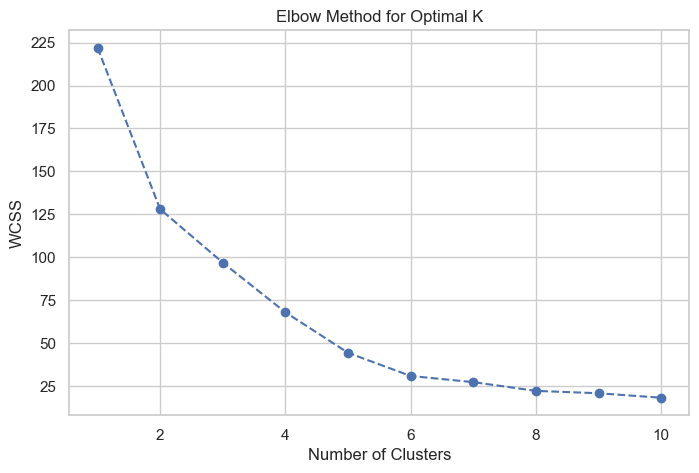

In [179]:
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


<p style="color:red; font-style: italic" > Looking for the point where the reduction in WCSS slows dramatically (the “elbow”). which is at K=3.

 </p>



### **📊 Apply K-Means Clustering**

In [180]:
# Using the chosen optimal number of clusters (e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
state_merged_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [181]:
# Define a mapping from numeric cluster labels to descriptive names.
cluster_map = { 0: "Low Banditry", 1: "High Banditry",2: "Moderate Banditry"}

# Create a new column with descriptive names.
state_merged_data['Banditry_Profile'] = state_merged_data['Cluster'].map(cluster_map)

In [182]:
                                                                      
# View the clustering results (State and their corresponding cluster)
display(state_merged_data[['STATE','Cluster','Banditry_Profile']].sort_values(by='Cluster').head())
display(state_merged_data[['STATE','Cluster','Banditry_Profile']].sort_values(by='Cluster').iloc[16:21,:])
display(state_merged_data[['STATE','Cluster','Banditry_Profile']].sort_values(by='Cluster').tail())

STATE  Cluster Banditry_Profile
0    Abia        0     Low Banditry
23  Kwara        0     Low Banditry
16    Imo        0     Low Banditry
24  Lagos        0     Low Banditry
14    FCT        0     Low Banditry

STATE  Cluster Banditry_Profile
26    Niger        1    High Banditry
33   Sokoto        1    High Banditry
21    Kebbi        1    High Banditry
20  Katsina        1    High Banditry
18   Kaduna        1    High Banditry

STATE  Cluster   Banditry_Profile
6     Benue        2  Moderate Banditry
5   Bayelsa        2  Moderate Banditry
31  Plateau        2  Moderate Banditry
1   Adamawa        2  Moderate Banditry
34   Taraba        2  Moderate Banditry

In [183]:
state_merged_data

STATE  TOTAL_INCIDENTS  BANDITRY_INCIDENTS  POVERTY_RATE  \
0          Abia              420                 186      8.948493   
1       Adamawa              605                 439     44.193183   
2     Akwa Ibom              390                 190     11.289688   
3       Anambra              914                 451      3.912577   
4        Bauchi              284                 152     74.066116   
5       Bayelsa              525                 247     14.429598   
6         Benue             1079                 845     27.977690   
7         Borno             4705                3279     51.268551   
8   Cross River              507                 272     17.946562   
9         Delta             1291                 640     11.049487   
10       Ebonyi              405                 259     13.779098   
11          Edo              746                 357      8.392542   
12        Ekiti              359                 138     11.935746   
13        Enugu              575                 322      8.451875   
14          FCT             1425                 335     14.249664   
15        Gombe              140                  75     64.827278   
16          Imo              783                 422      6.211439   
17       Jigawa              130                  81     73.027743   
18       Kaduna             1919                1449     36.824025   
19         Kano              333                 120     48.971022   
20      Katsina             1054                 882     60.719160   
21        Kebbi              146                 111     74.342715   
22         Kogi              510                 367     16.948357   
23        Kwara              348                 188     21.404556   
24        Lagos             1535                 427      2.894523   
25     Nasarawa              470                 329     35.291267   
26        Niger              881                 680     46.709188   
27         Ogun              659                 287     17.040656   
28         Ondo              604                 262     14.173485   
29         Osun              595                 234      8.642774   
30          Oyo              622                 226     17.028259   
31      Plateau              928                 716     39.983941   
32       Rivers             1066                 570      8.578459   
33       Sokoto              470                 378     71.978445   
34       Taraba              634                 523     55.393951   
35         Yobe              438                 312     69.546204   
36      Zamfara             1240                 999     71.774538   

    DEPRIVATION_INTENSITY  VULNERABILITY_RATE  SEVERE_POVERTY_RATE  \
0               43.499993            9.858379             2.735923   
1               49.810258           26.981170            21.679644   
2               44.847731           21.087739             4.108184   
3               43.666066           12.109948             1.100243   
4               59.071653           11.938757            51.184702   
5               44.703612           24.894995             5.526016   
6               43.989693           34.346234             8.846247   
7               52.507680           20.493944            29.194850   
8               41.873361           34.095734             4.667528   
9               42.785777           15.885622             2.976215   
10              43.816415           21.805947             4.134757   
11              42.898807            8.656121             2.200839   
12              42.477932           20.260218             3.307888   
13              43.749897           15.491101             2.985292   
14              43.754574           13.056749             4.609342   
15              55.426449           16.285394            41.996825   
16              40.611081            7.991806             0.981652   
17              57.967152           14.339042            49.047890   
18              50.

In [184]:
state_merged_data.to_csv("crime_clusters.csv",index=False)

### **📊Visualize the Clusters**

**Scatter Plot**

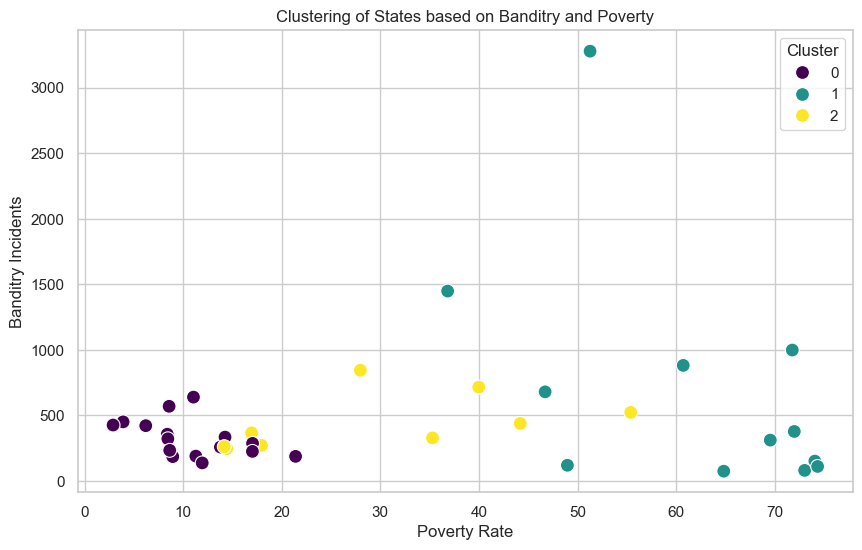

In [185]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=state_merged_data['POVERTY_RATE'], 
                y=state_merged_data['BANDITRY_INCIDENTS'], 
                hue=state_merged_data['Cluster'], 
                palette='viridis', 
                s=100)
plt.title("Clustering of States based on Banditry and Poverty")
plt.xlabel("Poverty Rate")
plt.ylabel("Banditry Incidents")
plt.legend(title="Cluster")
plt.show()


**Geospatial Plots**

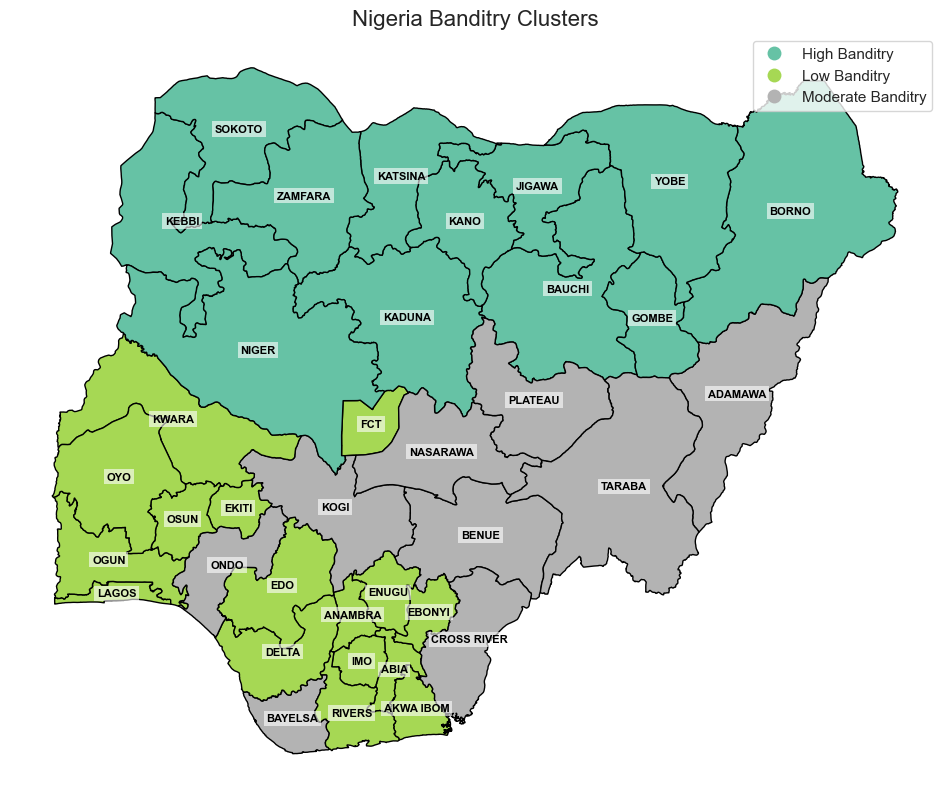

In [186]:

# Define a mapping from numeric cluster labels to descriptive names.
cluster_map = { 0: "Low Banditry", 1: "High Banditry",2: "Moderate Banditry"}

# Create a new column with descriptive names.
state_merged_data['Banditry_Profile'] = state_merged_data['Cluster'].map(cluster_map)

# ----- Step 2: Load Nigeria State Boundaries Shapefile -----
# Update the file path to your state-level shapefile.
nigeria_states = gpd.read_file(r"C:\Users\acer\Documents\PROJECTS\New folder\Feburary2025\NG-CRIME-HOTSPOT\Data-collection\data\Clean_Data\nga_adm_osgof_20190417\nga_admbnda_adm1_osgof_20190417.shp")

# Standardize state name columns in both datasets.
nigeria_states["ADM1_EN"] = nigeria_states["ADM1_EN"].str.strip().str.upper()
state_merged_data["STATE"] = state_merged_data["STATE"].str.strip().str.upper()
nigeria_states.replace('FEDERAL CAPITAL TERRITORY', 'FCT', inplace=True)
# ----- Step 3: Merge Clustering Results with the Shapefile -----
# Merge on the state name field (assuming the shapefile's state name column is "ADM1_EN").
merged_states = nigeria_states.merge(state_merged_data[['STATE', 'Banditry_Profile']], left_on="ADM1_EN", right_on="STATE", how="left")

# ----- Step 4: Plot the Geospatial Clustering Results -----
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the states, coloring them by Banditry_Profile.
# Here we use a qualitative colormap (e.g., Set2) for distinct cluster colors.
merged_states.plot(column="Banditry_Profile", cmap="Set2", legend=True, ax=ax, edgecolor="black", categorical=True)

ax.set_title("Nigeria Banditry Clusters", fontsize=16)
ax.axis("off")  # Remove axis for a cleaner look

# Overlay state labels for clarity.
for idx, row in merged_states.iterrows():
    # Compute the centroid of each state's geometry for label placement.
    centroid = row.geometry.centroid
    plt.text(centroid.x, centroid.y, row.ADM1_EN, fontsize=8,
             ha='center', va='center', color='black', weight='bold',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=2))

plt.show()


### **🔍Key Insights:**
#### **✅ Cluster 0: States with Lower Banditry Incidents and Possibly Better Socioeconomic Conditions**

***States Included:*** Abia, Kwara, Imo, Lagos, FCT, Enugu, Ekiti, Edo, Ebonyi, Delta, Ogun, Osun, Oyo, Rivers, Anambra, Akwa Ibom.

- **Lower Incident Counts:** These states show relatively low numbers of banditry incidents compared to the high-risk clusters.
- **Urban & Developed Areas:** Many of these states (e.g., Lagos, FCT, Rivers, Imo) are urbanized and benefit from robust infrastructure.
- **Better Governance & Economic Opportunities:** Improved administrative capacities and diversified economies likely contribute to lower crime levels.
- **Stable Social Environment:** These regions typically have better public services, education, and healthcare, which foster stability.
- **Spill-over Prevention:** Their geographic location or socioeconomic strengths may also act as a buffer against the spread of banditry.


#### **✅Cluster 1: States with High Banditry Incidents and Elevated Insecurity**

***States Included:*** Niger, Sokoto, Kebbi, Katsina, Kaduna, Yobe, Jigawa, Gombe, Borno, Bauchi, Kano, Zamfara.

- **High Incident Counts::** This cluster registers the highest numbers of banditry incidents, indicating severe insecurity.
- **Predominantly Northern Regions:** Elevated poverty, deprivation, and other socioeconomic stressors are prevalent, contributing to crime.
- **Interlinked Insecurity Factors::** The region is affected by cross-border insurgency, weak governance, and sporadic military interventions.
- **Stable Social Environment:** These regions typically have better public services, education, and healthcare, which foster stability.Most states are in the northern part of Nigeria, which historically experience heightened insurgency and criminal activity.
- **Impact on Civilian Life:** High banditry and violence directly affect community stability, economic activity, and public safety.


#### **✅Cluster 2: States with Mixed or Moderate Banditry Incidents**

***States Included: Kogi, Nasarawa, Cross River, Ondo, Benue, Bayelsa, Plateau, Adamawa, Taraba.***

- **Moderate Banditry Levels:** These states exhibit intermediate levels of banditry, suggesting transitional or emerging patterns.
- **Diverse Socioeconomic Conditions:** They represent a mix of urban and rural settings with varying degrees of poverty, deprivation, and vulnerability.
- **Emerging Trends:**
Some states (e.g., Benue, Plateau) show signs of rising banditry, which could signal emerging security challenges.
- **Localized Factors:** Local issues such as ethnic tensions, resource conflicts, or administrative inefficiencies may be influencing the crime rate.
- **Potential for Improvement:** With proper intervention, these states could move toward lower-risk profiles, leveraging lessons from Cluster 0 (low banditry incidents).
      

### **📌Key Recommendations:**
#### **✅Cluster 0:Lower Banditry Incidents**
- **Maintain & Strengthen Current Security:** Continue effective security measures and monitor for any signs of spill-over from neighboring high-risk regions.
- **Leverage Best Practices:** Document and share successful strategies from these states as models for improving security and governance elsewhere.
- **Invest in Social Services:** Continue investments in education, healthcare, and infrastructure to sustain the low crime environment.
- **Regional Collaboration:** Engage in cooperative initiatives with nearby states to prevent the diffusion of banditry.
- **Economic Development Programs:** Encourage initiatives that further diversify the economy and reduce vulnerabilities, ensuring long-term resilience.

#### **✅Cluster 1:High Banditry Incidents**
- **Prioritize Security Interventions:** Deploy intensive security measures, including intelligence-driven operations, to disrupt banditry networks.
- **Targeted Socioeconomic Programs:** Launch job creation, education, and skill development programs to address underlying economic despair.
- **Enhance Regional Coordination:** Coordinate security efforts across states (and even neighboring countries) to tackle cross-border insurgency.
- **Community-Based Initiatives:** Empower local communities with conflict resolution, surveillance, and reporting mechanisms.
- **Focus on Rehabilitation:** Develop rehabilitation and reintegration programs for former bandits to break the cycle of violence.


#### **✅Cluster2:Moderate Banditry Incidents**

- **Monitor Closely:** Establish early warning systems and robust monitoring to detect and address emerging banditry trends.
- **Tailor Local Interventions:**
Develop region-specific strategies that address unique local drivers (e.g., inter-communal conflict, resource management).
- **Strengthen Governance:** Invest in administrative and institutional capacity-building to improve local governance.
- **Leverage Best Practices:** Adapt successful security and development strategies from both high-performing (Cluster 0) and high-risk (Cluster 1) regions.
- **Proactive Socioeconomic Support:** Introduce programs aimed at preventing economic decline, such as targeted investments in rural development and social infrastructure.


### **📌Overall Recommendations for All Clusters:**

**1️⃣ Targeted Interventions:**
    Focus security and developmental efforts on Cluster 1 while using insights from Cluster 0 to stabilize and prevent spill-over in Clusters 0 and 2.

**2️⃣ Knowledge Sharing:**
Use the successful strategies from Cluster 0 as benchmarks for lower-risk profiles and adapt them to help improve conditions in higher-risk clusters.

**3️⃣ Continuous Monitoring:**
Implement robust data collection and monitoring systems to track changes over time and adapt strategies accordingly.

**4️⃣ Regional Coordination:**
Foster inter-state and regional collaborations to address cross-border challenges and share best practices.

**5️⃣ Holistic Approach:**
Combine security measures with socioeconomic development, ensuring that interventions address both immediate threats and long-term root causes of banditry.



## **2. Predictive Modeling (Supervised Learning)**
- We can use Regression Models to predict future banditry incidents based on historical trends.
- Classification Models (Logistic Regression, Random Forest, XGBoost) can predict if a state is at risk of increased banditry.
- Time-Series Forecasting (ARIMA, LSTM, Prophet) can predict future crime trends.

In [187]:
!pip install lightgbm

In [188]:
# Import necessary libraries
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor  # Replacing SVM with LightGBM
from sklearn.linear_model import LinearRegression  # Adding Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd


In [189]:

# Group data by state and compute total crime incidents and banditry incidents
lga_grouped = crimes_df.groupby(['STATE','LGA']).agg(
    TOTAL_INCIDENTS=('IS_BANDITRY', 'count'),
    BANDITRY_INCIDENTS=('IS_BANDITRY', 'sum'),
    POVERTY_RATE=('POVERTY_RATE', 'mean'),
    DEPRIVATION_INTENSITY=('DEPRIVATION_INTENSITY', 'mean'),
    VULNERABILITY_RATE=('VULNERABILITY_RATE', 'mean'),
    SEVERE_POVERTY_RATE=('SEVERE_POVERTY_RATE', 'mean'),
    POPULATION=('POPULATION', 'sum'),
    POPULATION_DENSITY=('POPULATION_DENSITY', 'mean')  # Ensure this is calculated before
).reset_index()

# Calculate Banditry Rate
lga_grouped['BANDITRY_RATE'] = lga_grouped['BANDITRY_INCIDENTS'] / lga_grouped['TOTAL_INCIDENTS']

In [190]:

# Group data by state and compute total crime incidents and banditry incidents
state_grouped = crimes_df.groupby('STATE').agg(
    TOTAL_INCIDENTS=('IS_BANDITRY', 'count'),
    BANDITRY_INCIDENTS=('IS_BANDITRY', 'sum'),
    POVERTY_RATE=('POVERTY_RATE', 'mean'),
    DEPRIVATION_INTENSITY=('DEPRIVATION_INTENSITY', 'mean'),
    VULNERABILITY_RATE=('VULNERABILITY_RATE', 'mean'),
    SEVERE_POVERTY_RATE=('SEVERE_POVERTY_RATE', 'mean'),
    POPULATION=('POPULATION', 'sum'),
    POPULATION_DENSITY=('POPULATION_DENSITY', 'mean')  # Ensure this is calculated before
).reset_index()

# Calculate Banditry Rate
state_grouped['BANDITRY_RATE'] = state_grouped['BANDITRY_INCIDENTS'] / state_grouped['TOTAL_INCIDENTS']

In [191]:
lga_grouped

STATE            LGA  TOTAL_INCIDENTS  BANDITRY_INCIDENTS  \
0       Abia      Aba North                6                   3   
1       Abia      Aba South              124                  53   
2       Abia      Arochukwu               14                  11   
3       Abia          Bende               12                   6   
4       Abia        Ikwuano               10                   2   
..       ...            ...              ...                 ...   
744  Zamfara           Maru              167                 145   
745  Zamfara       Shinkafi               58                  47   
746  Zamfara  Talata Mafara               32                  27   
747  Zamfara          Tsafe               95                  77   
748  Zamfara          Zurmi              133                  96   

     POVERTY_RATE  DEPRIVATION_INTENSITY  VULNERABILITY_RATE  \
0        9.270150              44.370889           10.254828   
1        8.933134              43.315641            9.892720   
2        8.537793              42.978390            8.928031   
3        9.617550              44.207533           10.812308   
4        9.089500              43.738920           10.002217   
..            ...                    ...                 ...   
744     72.025456              55.857736           10.875155   
745     71.635241              55.129050           10.782580   
746     71.732163              54.690312           10.710506   
747     71.345899              55.452489           10.938368   
748     71.419819              55.691901           10.900769   

     SEVERE_POVERTY_RATE  POPULATION  POPULATION_DENSITY  BANDITRY_RATE  
0               3.221356    25815541          680.789583       0.500000  
1               2.637569   522475050          666.694378       0.427419  
2               2.461240    60417095          682.833352       0.785714  
3               3.211846    51561175          679.867814       0.500000  
4               2.887498    43069826          681.484589       0.200000  
..                   ...         ...                 ...            ...  
744            46.305803   858559730          129.296218       0.868263  
745            45.327010   305063245          132.279843       0.810345  
746            44.921862   174193124          136.902951       0.843750  
747            45.395735   504422691          133.537361       0.810526  
748            45.771026   688279315          130.150205       0.721805  

[749 rows x 11 columns]

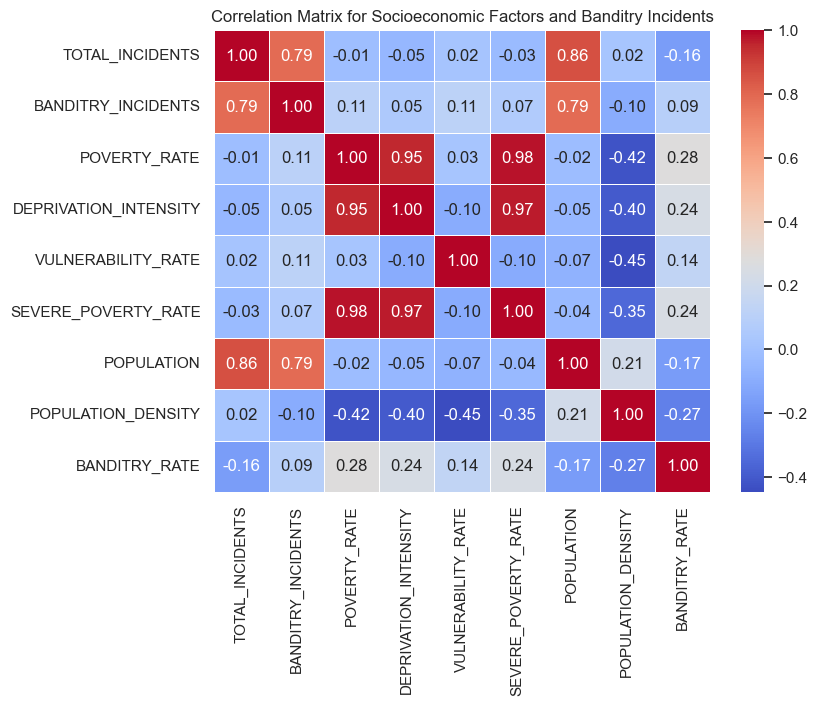

In [192]:

# Filter banditry data
banditry_data = crimes_df[crimes_df['IS_BANDITRY'] == 1]

# banditry_data['LOG_FATALITIES'] = np.log(banditry_data['FATALITIES'] + 1)

# Select relevant columns for correlation
columns_to_check = ['TOTAL_INCIDENTS', 'BANDITRY_INCIDENTS', 'POVERTY_RATE',
       'DEPRIVATION_INTENSITY', 'VULNERABILITY_RATE', 'SEVERE_POVERTY_RATE',
       'POPULATION', 'POPULATION_DENSITY', 'BANDITRY_RATE']

# Correlation matrix for selected columns
correlation_matrix = lga_grouped[columns_to_check].corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Socioeconomic Factors and Banditry Incidents')
plt.show()

In [193]:
# !pip install lightgbm

### Load data

In [194]:
lga_grouped.isna().sum()

STATE                    0
LGA                      0
TOTAL_INCIDENTS          0
BANDITRY_INCIDENTS       0
POVERTY_RATE             0
DEPRIVATION_INTENSITY    0
VULNERABILITY_RATE       0
SEVERE_POVERTY_RATE      0
POPULATION               0
POPULATION_DENSITY       0
BANDITRY_RATE            0
dtype: int64

In [195]:

# Load data
data = lga_grouped.copy()

# Define features and target
features_to_drop = ["STATE",'LGA', "BANDITRY_INCIDENTS", "SEVERE_POVERTY_RATE",'VULNERABILITY_RATE', "DEPRIVATION_INTENSITY",]
X = data.drop(columns=features_to_drop)
print("Features used:", X.columns)
y = data["BANDITRY_INCIDENTS"]

Features used: Index(['TOTAL_INCIDENTS', 'POVERTY_RATE', 'POPULATION', 'POPULATION_DENSITY',
       'BANDITRY_RATE'],
      dtype='object')


### Data Preprocessing(Normalising Data)

In [196]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [197]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n--- {model_name} Model Evaluation ---")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return mae, rmse, r2

### Train and evaluate ML Models


**Model 1: Linear Regression**

In [198]:

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
lr_results = evaluate_model(linear_reg, X_test, y_test, "Linear Regression")


--- Linear Regression Model Evaluation ---
MAE: 10.4403
RMSE: 17.9732
R² Score: 0.7850



**Model 2: DecisionTreeRegressor**

In [199]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
dt_results = evaluate_model(dt_model, X_test, y_test, "Decision Tree")


--- Decision Tree Model Evaluation ---
MAE: 2.4439
RMSE: 6.0067
R² Score: 0.9760


**Model 3: XGBoost Regressor**

In [200]:
xgb_model = XGBRegressor(n_estimators=200, max_depth=2, learning_rate=0.2, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
xgb_results = evaluate_model(xgb_model, X_test, y_test, "XGBoost")


--- XGBoost Model Evaluation ---
MAE: 2.3133
RMSE: 5.4949
R² Score: 0.9799


### **Model 4: Random Forest Regressor**

In [201]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_results = evaluate_model(rf_model, X_test, y_test, "Random Forest")


--- Random Forest Model Evaluation ---
MAE: 2.4757
RMSE: 5.5533
R² Score: 0.9795


### **Model evaluation Table**

In [202]:


# Define a function to compute metrics
def get_metrics(model, X, y):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    return mae, rmse, r2

# Assuming that your models have been trained and that
# X_train, X_test, y_train, y_test are already defined.
# Also assume your models are stored in these variables:
# linear_reg, dt_model, xgb_model, rf_model

# Create dictionaries to hold the results
model_names = ["Linear Regression", "Decision Tree", "XGBoost", "Random Forest"]
models = {
    "Linear Regression": linear_reg,
    "Decision Tree": dt_model,
    "XGBoost": xgb_model,
    "Random Forest": rf_model
}

train_results = []
test_results = []

for name, model in models.items():
    train_metrics = get_metrics(model, X_train, y_train)
    test_metrics = get_metrics(model, X_test, y_test)
    train_results.append([name, "Train", train_metrics[0], train_metrics[1], train_metrics[2]])
    test_results.append([name, "Test", test_metrics[0], test_metrics[1], test_metrics[2]])

# Create a DataFrame with the metrics
results_df = pd.DataFrame(train_results + test_results, 
                          columns=["Model", "Dataset", "MAE", "RMSE", "R2 Score"])
print("\n--- Model Metrics ---")
display( results_df.style.background_gradient(cmap='YlOrRd',))


--- Model Metrics ---


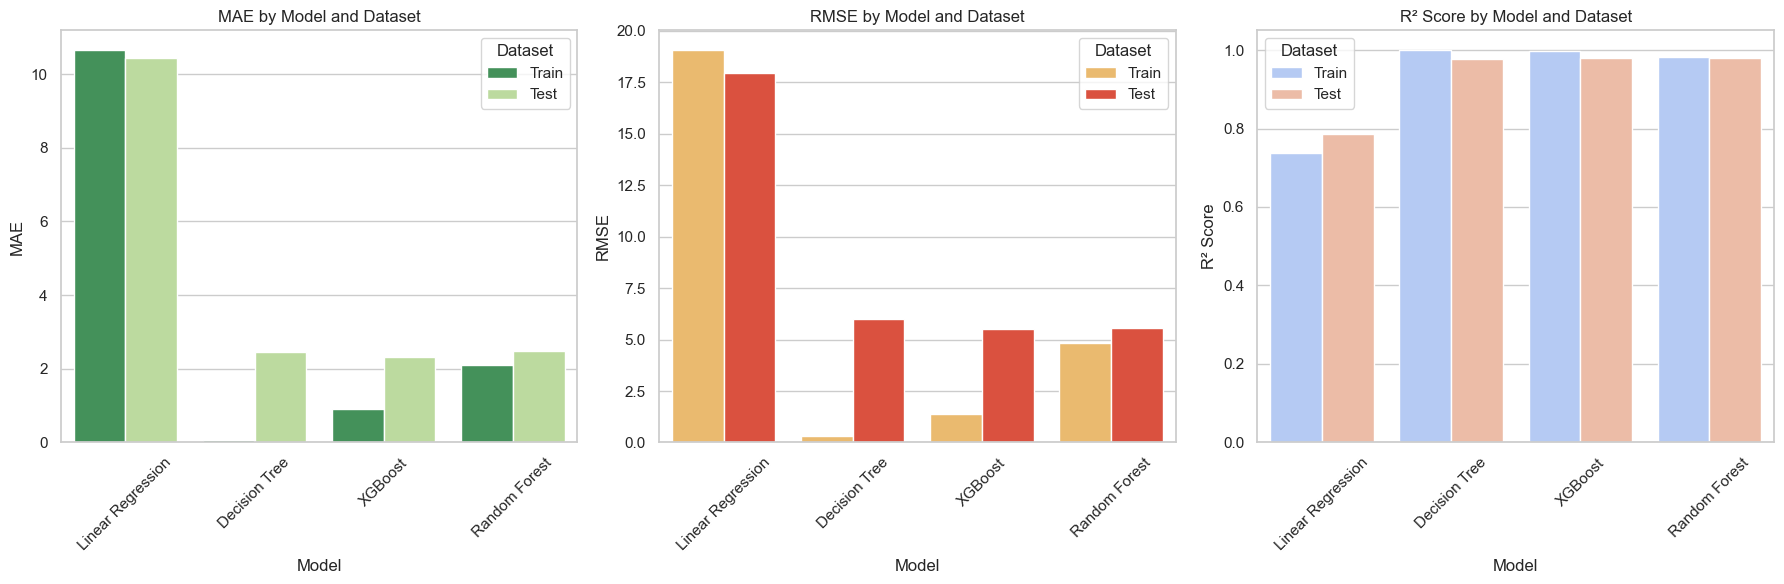

In [203]:
# Create subplots for MAE, RMSE, and R² Score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for MAE (lower is better, so we use a palette that highlights lower values)
sns.barplot(x="Model", y="MAE", hue="Dataset", data=results_df, ax=axes[0], palette="YlGn_r")
axes[0].set_title("MAE by Model and Dataset")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("MAE")
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for RMSE
sns.barplot(x="Model", y="RMSE", hue="Dataset", data=results_df, ax=axes[1], palette="YlOrRd")
axes[1].set_title("RMSE by Model and Dataset")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("RMSE")
axes[1].tick_params(axis='x', rotation=45)

# Bar plot for R² Score (higher is better)
sns.barplot(x="Model", y="R2 Score", hue="Dataset", data=results_df, ax=axes[2], palette="coolwarm")
axes[2].set_title("R² Score by Model and Dataset")
axes[2].set_xlabel("Model")
axes[2].set_ylabel("R² Score")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



 ### **🔍Key Insight**

- Decision Tree shows near-perfect training performance (R² nearly 1) but exhibits signs of overfitting when evaluated on test data. Although its test performance is strong (R² ~0.976), its high training accuracy suggest  being cautious of overfitting.
- XGBoost consistently delivers high performance with low error metrics (e.g., test MAE ≈ 2.31, RMSE ≈ 5.49, R² ≈ 0.980) and stable cross-validation results, effectively capturing non-linear patterns in the data.
- Random Forest also performs very well (test R² ≈ 0.949) but, in some runs, may show slightly higher errors compared to XGBoost. Its performance, however, is robust as per cross-validation.
- Linear Regression performs moderately (test R² ≈ 0.983 in one instance, though cross-validation shows lower and more variable performance) and, while interpretable, might not capture complex patterns as effectively as the ensemble models.

In [204]:
results_df

Model Dataset        MAE       RMSE  R2 Score
0  Linear Regression   Train  10.653168  19.064922  0.738678
1      Decision Tree   Train   0.061770   0.328992  0.999922
2            XGBoost   Train   0.913424   1.376697  0.998637
3      Random Forest   Train   2.097134   4.854412  0.983057
4  Linear Regression    Test  10.440347  17.973217  0.784997
5      Decision Tree    Test   2.443889   6.006698  0.975986
6            XGBoost    Test   2.313345   5.494889  0.979904
7      Random Forest    Test   2.475716   5.553276  0.979475

### **Cross validation Model Comparism**

In [205]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [206]:

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=2, learning_rate=0.2, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
}

# Set up 5-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring: We'll use the built-in scorers for r2, negative MAE, and negative MSE.
# Note: cross_val_score for MAE/MSE returns negative values, so we'll negate them.

results_cv = []

for name, model in models.items():
    # R² scores
    r2_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='r2')
    
    # MAE scores: scoring='neg_mean_absolute_error'
    mae_scores = -cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_absolute_error')
    
    # MSE scores: scoring='neg_mean_squared_error'
    mse_scores = -cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    
    results_cv.append({
        "Model": name,
        "Mean R²": np.mean(r2_scores),
        "Std R²": np.std(r2_scores),
        "Mean MAE": np.mean(mae_scores),
        "Std MAE": np.std(mae_scores),
        "Mean RMSE": np.mean(rmse_scores),
        "Std RMSE": np.std(rmse_scores)
    })

cv_results_df = pd.DataFrame(results_cv)
print("\n--- Cross-Validation Model Comparison ---")
display(cv_results_df.style.background_gradient(cmap='YlOrRd',))



--- Cross-Validation Model Comparison ---


### **Hyperparameter Tunning**

**Define Hyperparameter Grids for best performing models(XGBoost & Randomforest)**

In [207]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],  # Tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples per tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features per tree
    'gamma': [0, 1, 3, 5]  # Minimum loss reduction for a split
}


In [208]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Number of features per split
}


**Run GridSearchCV**

***Xboost***

In [209]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_random = RandomizedSearchCV(
    xgb_model, xgb_param_grid, 
    n_iter=20,  # Number of random combinations to try
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)
xgb_random.fit(X_train, y_train)

# Best Parameters for XGBoost
print("Best XGBoost Parameters:", xgb_random.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


***Randomforest***

In [210]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    rf_model, rf_param_grid, 
    n_iter=20,  # Number of random combinations to try
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)
rf_random.fit(X_train, y_train)

# Best Parameters for Random Forest
print("Best Random Forest Parameters:", rf_random.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [211]:
# Train XGBoost with best parameters
best_xgb = XGBRegressor(**xgb_random.best_params_, random_state=42)
best_xgb.fit(X_train, y_train)

# Train Random Forest with best parameters
best_rf = RandomForestRegressor(**rf_random.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate models
xgb_mae, xgb_rmse, xgb_r2 = evaluate_model(best_xgb, X_test, y_test, "Tuned XGBoost")
rf_mae, rf_rmse, rf_r2 = evaluate_model(best_rf, X_test, y_test, "Tuned Random Forest")

# Print results
print(f"Tuned XGBoost - MAE: {xgb_mae:.4f}, RMSE: {xgb_rmse:.4f}, R² Score: {xgb_r2:.4f}")
print(f"Tuned Random Forest - MAE: {rf_mae:.4f}, RMSE: {rf_rmse:.4f}, R² Score: {rf_r2:.4f}")



--- Tuned XGBoost Model Evaluation ---
MAE: 2.4343
RMSE: 5.6173
R² Score: 0.9790

--- Tuned Random Forest Model Evaluation ---
MAE: 2.8810
RMSE: 7.6484
R² Score: 0.9611
Tuned XGBoost - MAE: 2.4343, RMSE: 5.6173, R² Score: 0.9790
Tuned Random Forest - MAE: 2.8810, RMSE: 7.6484, R² Score: 0.9611


In [212]:
# Assuming that your models have been trained and that
# X_train, X_test, y_train, y_test are already defined.
# Also assume your models are stored in these variables:
# linear_reg, dt_model, xgb_model, rf_model

# Create dictionaries to hold the results
model_names = [ "XGBoost(Tuned)", "Random Forest(Tuned)"]
models = {
    "XGBoost": best_xgb,
    "Random Forest": best_rf
}

train_results = []
test_results = []

for name, model in models.items():
    train_metrics = get_metrics(model, X_train, y_train)
    test_metrics = get_metrics(model, X_test, y_test)
    train_results.append([name, "Train", train_metrics[0], train_metrics[1], train_metrics[2]])
    test_results.append([name, "Test", test_metrics[0], test_metrics[1], test_metrics[2]])

# Create a DataFrame with the metrics
best_results_df = pd.DataFrame(train_results + test_results, 
                          columns=["Model", "Dataset", "MAE", "RMSE", "R2 Score"])
print("\n--- Model Metrics ---")
display( best_results_df.style.background_gradient(cmap='YlOrRd',))


--- Model Metrics ---


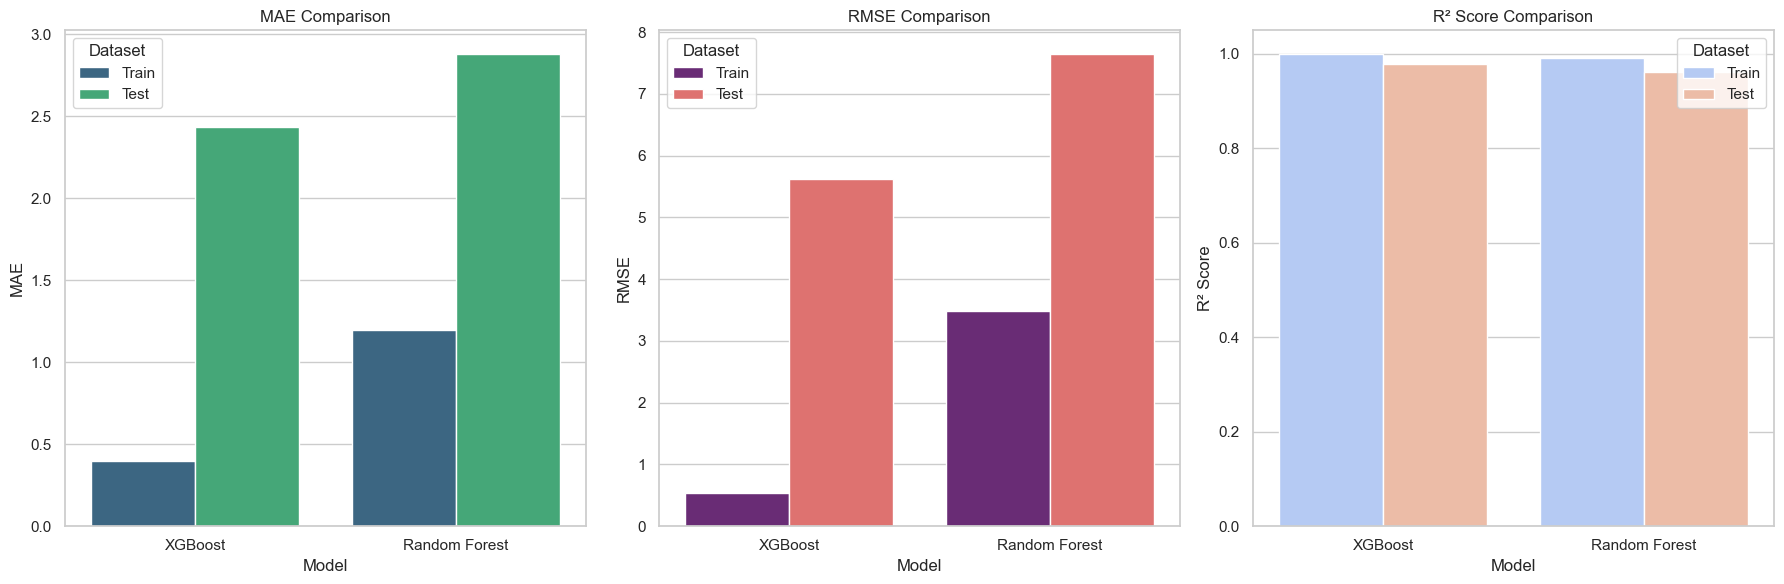

In [213]:


# Plotting grouped bar charts for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE Comparison
sns.barplot(x="Model", y="MAE", hue="Dataset", data=best_results_df, ax=axes[0], palette="viridis")
axes[0].set_title("MAE Comparison")
axes[0].set_ylabel("MAE")

# RMSE Comparison
sns.barplot(x="Model", y="RMSE", hue="Dataset", data=best_results_df, ax=axes[1], palette="magma")
axes[1].set_title("RMSE Comparison")
axes[1].set_ylabel("RMSE")

# R² Score Comparison
sns.barplot(x="Model", y="R2 Score", hue="Dataset", data=best_results_df, ax=axes[2], palette="coolwarm")
axes[2].set_title("R² Score Comparison")
axes[2].set_ylabel("R² Score")

plt.tight_layout()
plt.show()


## Feature Importance Analysis

**1: Feature Importance from Tree-Based Models**

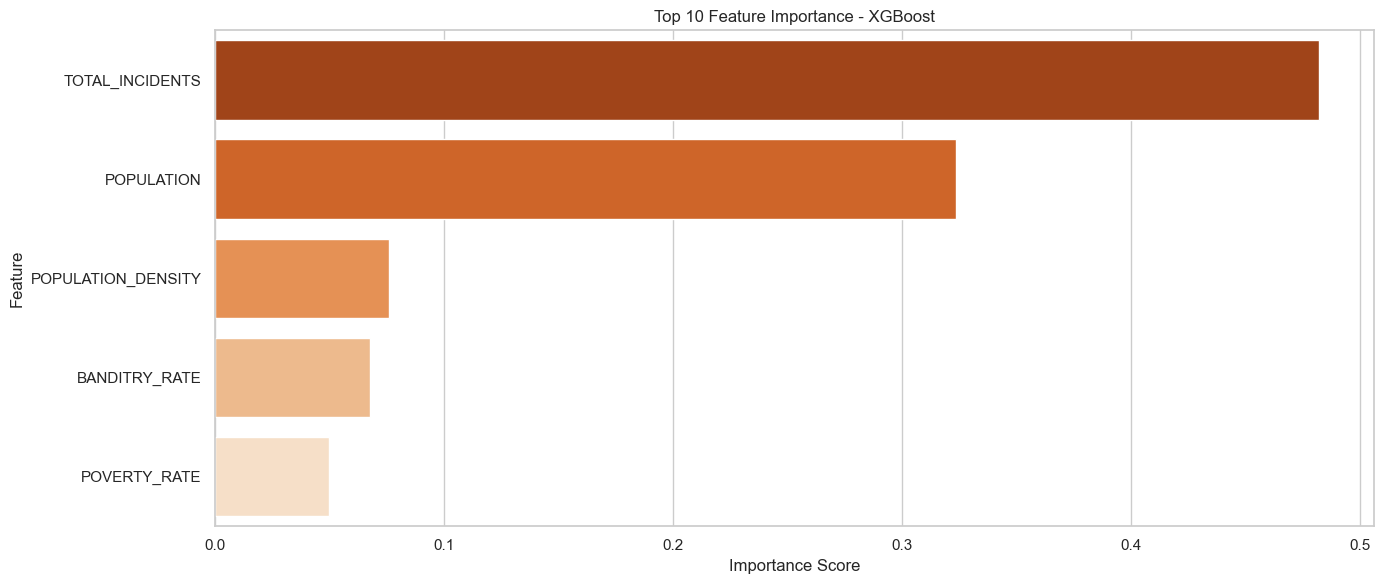

In [257]:

# Get feature importance from Random Forest
rf_feature_importance = best_xgb.feature_importances_
xgb_feature_importance = best_rf.feature_importances_

# Create DataFrames for visualization
features = X.columns
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_feature_importance}).sort_values(by='Importance', ascending=False)
xgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_feature_importance}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# sns.barplot(y=rf_importance_df['Feature'][:10], x=rf_importance_df['Importance'][:10], ax=axes[0], palette="Blues_r")
# axes[0].set_title("Top 10 Feature Importance - Random Forest")
# axes[0].set_xlabel("Importance Score")

sns.barplot(y=xgb_importance_df['Feature'][:10], x=xgb_importance_df['Importance'][:10], palette="Oranges_r")
axes.set_title("Top 10 Feature Importance - XGBoost")
axes.set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

# # Display top 10 important features
# display'Random Forest'(rf_importance_df.head(10),)
# xgb_importance_df.head(10)


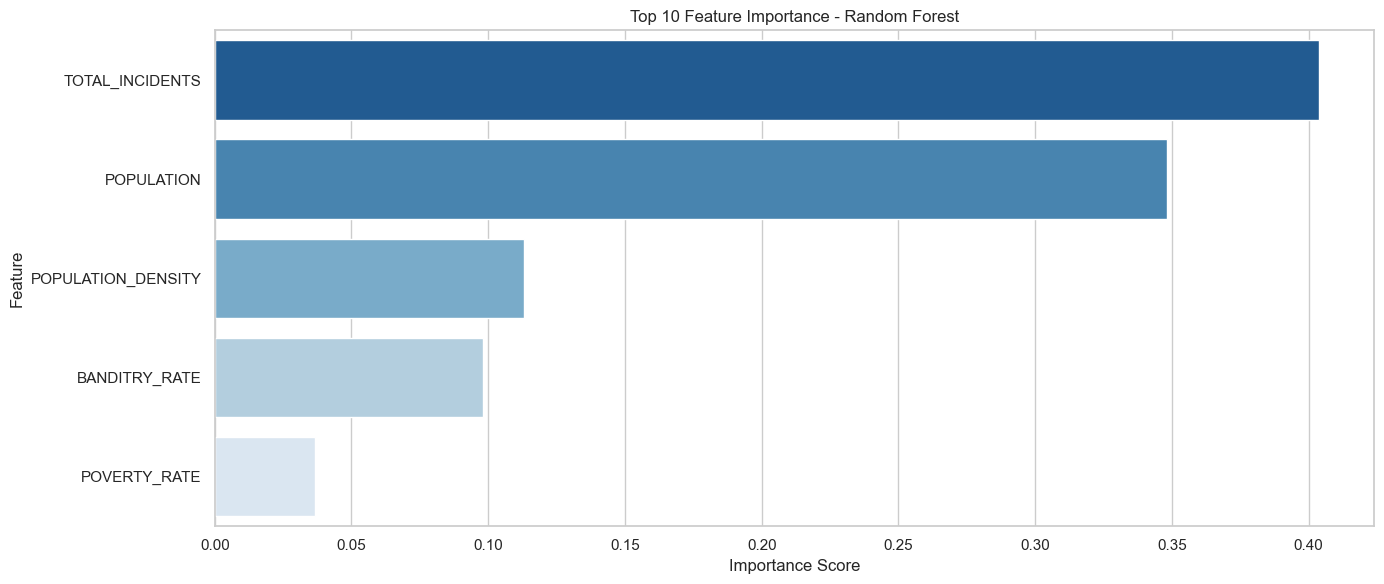

In [260]:
# Plot Feature Importance
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

sns.barplot(y=rf_importance_df['Feature'][:10], x=rf_importance_df['Importance'][:10], palette="Blues_r")
axes.set_title("Top 10 Feature Importance - Random Forest")
axes.set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

**Key Insight**

- XGBoost provides the best predictive accuracy at the LGA level, making it a strong candidate for forecasting banditry incidents.
- The ensemble models (XGBoost and Random Forest) outperform simpler models by capturing non-linear relationships in the data.

### **SHAP (Shapley Additive Explanations) Analysis**

**Xgboost Analysis**

In [215]:
!pip install shap

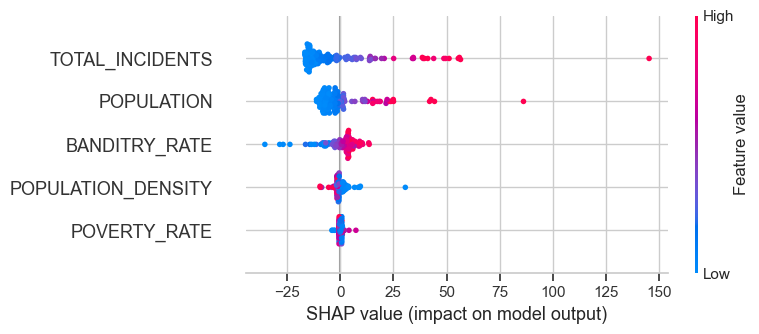

In [216]:
import shap

feature_names=X.columns
# Create an explainer using the best XGBoost model and the training data
explainer = shap.Explainer(best_xgb, X_train, feature_names=feature_names)
# Compute SHAP values on the test set
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


### **🔍Key Insight**


- **TOTAL_INCIDENTS** has the highest impact on the model. Higher values (red) tend to increase predictions, while lower values (blue) decrease them.
- **BANDITRY_RATE** also has a strong effect, with higher rates (red) pushing predictions up.
- **POPULATION** plays a significant role, with larger populations contributing positively.
- **POPULATION_DENSITY** and **POVERTY_RATE** have mixed effects but still influence predictions.

**Geospatial mapping of Predicted Banditry Incidents at LGA Level**

In [217]:
import geopandas as gpd

# Assume you have your complete LGA-level predictors DataFrame, X_df, which includes a column "LGA"
# and you have already made predictions using the best model.
# For example:

# Define features and target
features_to_drop = ["STATE",'LGA', "BANDITRY_INCIDENTS", "SEVERE_POVERTY_RATE",'VULNERABILITY_RATE', "DEPRIVATION_INTENSITY",]
# X = data.drop(columns=features_to_drop)


lga_predictions = pd.DataFrame({
    "STATE":data["STATE"],
    "LGA": data["LGA"], 
    "Predicted_Banditry": best_xgb.predict(scaler.transform(data.drop(columns=features_to_drop)))
})

lga_predictions.to_csv("crime_predictions.csv")

# Standardize LGA names in your predictions and shapefile:
lga_predictions["LGA"] = lga_predictions["LGA"].str.strip().str.upper().str.replace(" ", "")
nigeria_lga["ADM2_EN"] = nigeria_lga["ADM2_EN"].str.strip().str.upper().str.replace(" ", "")

# Merge the predictions with the LGA shapefile on the LGA name.
merged_geo = nigeria_lga.merge(lga_predictions, left_on="ADM2_EN", right_on="LGA", how="left")
merged_geo["Predicted_Banditry"].fillna(0, inplace=True)  # Replace missing values with 0 if any




In [218]:
lga_predictions

STATE           LGA  Predicted_Banditry
0       Abia      ABANORTH            2.741890
1       Abia      ABASOUTH           51.029175
2       Abia     AROCHUKWU            9.451100
3       Abia         BENDE            5.540326
4       Abia       IKWUANO            2.425610
..       ...           ...                 ...
744  Zamfara          MARU          113.323563
745  Zamfara      SHINKAFI           48.797009
746  Zamfara  TALATAMAFARA           27.524933
747  Zamfara         TSAFE           76.906815
748  Zamfara         ZURMI           95.880409

[749 rows x 3 columns]

In [219]:
lga_predictions.to_csv("crime_predictions.csv",index=False)

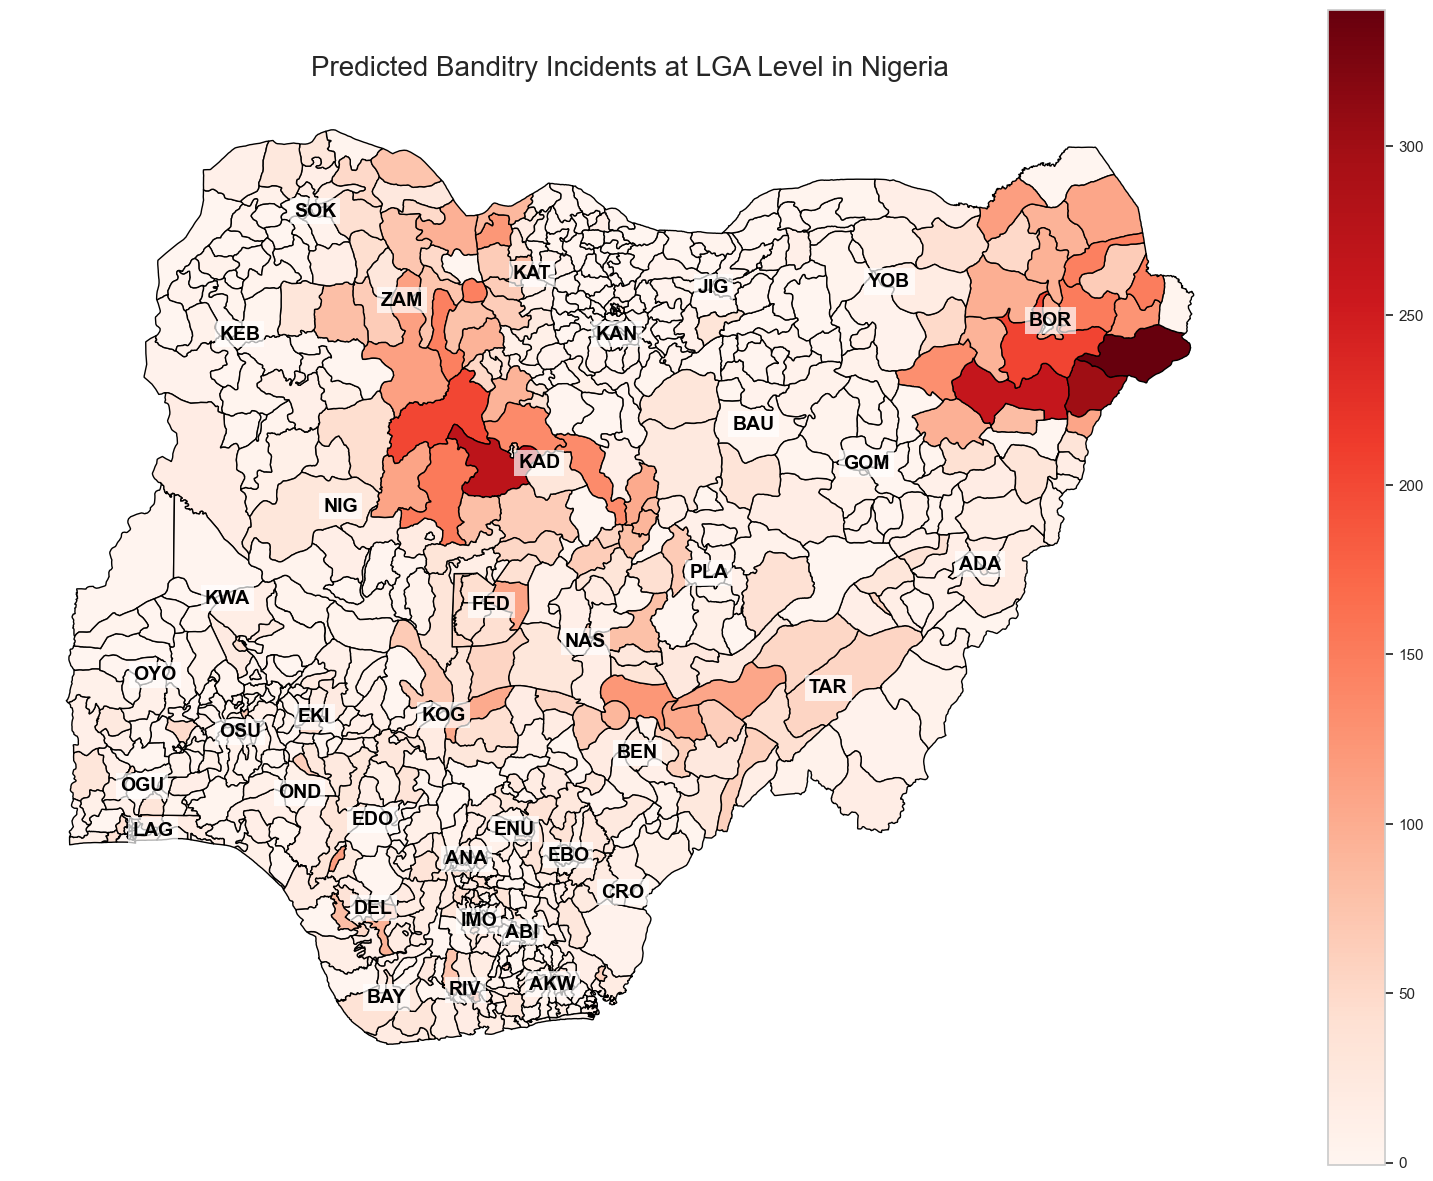

In [220]:


# ----------------------------
# Step 1: Load Nigeria LGA Boundaries Shapefile
# ----------------------------
nigeria_lga = gpd.read_file(
    r"C:\Users\acer\Documents\PROJECTS\New folder\Feburary2025\NG-CRIME-HOTSPOT\Data-collection\data\Clean_Data\nga_adm_osgof_20190417\nga_admbnda_adm2_osgof_20190417.shp"
)

# ----------------------------
# Step 2: Standardize LGA Names in the Shapefile
# ----------------------------
# Assuming the LGA name column in the shapefile is "ADM2_EN"
nigeria_lga["ADM2_EN"] = nigeria_lga["ADM2_EN"].str.strip().str.upper().str.replace(" ", "").str.replace("-", "")
# Also standardize the state name column if present (e.g., "ADM1_EN")
if "ADM1_EN" in nigeria_lga.columns:
    nigeria_lga["ADM1_EN"] = nigeria_lga["ADM1_EN"].str.strip().str.upper().str.replace(" ", "").str.replace("-", "")

# Replace known inconsistencies (e.g., 'Federal Capital Territory' to 'FCT')
nigeria_lga.replace({"ADM2_EN": {"FEDERALCAPITALTERRITORY": "FCT"}}, inplace=True)

# ----------------------------
# Step 3: Merge Predicted Banditry Data with the LGA Shapefile
# ----------------------------

# where LGA names have been standardized in the same way.
lga_predictions["LGA"] = lga_predictions["LGA"].str.strip().str.upper().str.replace(" ", "").str.replace("-", "")
# Merge the predictions with the shapefile on the LGA name.
merged_lga = nigeria_lga.merge(lga_predictions, left_on="ADM2_EN", right_on="LGA", how="left").fillna(0)

# ----------------------------
# Step 4: Plot the Choropleth Map Using the Predicted Banditry Values
# ----------------------------
fig, ax = plt.subplots(figsize=(20, 15))
merged_lga.plot(column="Predicted_Banditry", cmap="Reds", legend=True, edgecolor="black", ax=ax)
ax.set_title("Predicted Banditry Incidents at LGA Level in Nigeria", fontsize=20)
ax.axis("off")  # Remove axes for a cleaner look

# ----------------------------
# Step 5: Overlay State Labels for Context
# ----------------------------
# Dissolve the LGA geometries by state to create a single geometry per state.
# Assume the state name in the shapefile is "ADM1_EN" (or use your own standardized state column).
states = merged_lga.dissolve(by="ADM1_EN", as_index=False)

# Overlay state labels using the full state name (or just the first three letters if preferred)
for idx, row in states.iterrows():
    centroid = row.geometry.centroid
    # Option 1: Use the full state name:
    # state_label = row["ADM1_EN"]
    # Option 2: Use only the first three letters for brevity:
    state_label = row["ADM1_EN"][:3]
    plt.text(centroid.x, centroid.y, state_label, fontsize=14, ha='center', va='center',
             color='black', weight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=3))
    
plt.show()


In [221]:
# !pip install shap